#1. Using All Features

##Data Loading

In [1]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [3]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
267                   0                           0        1.0        8.0   
268                   1                           0        NaN       15.0   
269                   1                           0        NaN       12.0   
270                   0                           1        NaN       15.0   
271                   0                           0        NaN        6.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              2.0               6.0                                 2.0   
..             ...               ...                                 ...   
267            NaN               9.0                                 2.0   
268            NaN               5.0                                 2.0   
269            NaN              13.0                                 2.0   
270            NaN              15.0                                 2.0   
271            NaN               2.0                                 1.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
267       0       0                     0           NaN         NaN   0  
268       0       0                     0           NaN         NaN   0  
269       1       1                     0           NaN         NaN   0  
270       1       1                     1           NaN         NaN   0  
271       0       1                     0           NaN         NaN   0  

[272 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [4]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [5]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [6]:
#Install library for imputation
!pip install impyute

In [7]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

Correlation Matrix


Sex       Age  OCB + in CSF  \
Sex                                 1.000000 -0.074293      0.176182   
Age                                -0.074293  1.000000      0.066331   
OCB + in CSF                        0.176182  0.066331      1.000000   
VEP +                               0.156484  0.010119      0.141808   
BAEP +                              0.153455  0.208582      0.164978   
Periventricular                     0.198072  0.032043      0.275639   
MRI spinal lesions                 -0.003224  0.125208      0.144302   
MRI infratentorial lesions          0.167687 -0.042536      0.138258   
Varicella                           0.138524  0.178870      0.008728   
Schooling                           0.013178 -0.157770      0.088440   
Breastfeeding                       0.209647 -0.130657     -0.033890   
Initial Symptoms                    0.148319  0.111633      0.240582   
Monosymptomatic or Polysymptomatic -0.009859  0.007770      0.161780   
LLSSEP                              0.156063  0.054780      0.012293   
ULSSEP                              0.156472  0.088285      0.065600   
MRI cortical lesions                0.128735  0.082606      0.183323   
Initial EDSS                        0.177914  0.137810      0.148568   
Final EDSS                          0.126508  0.242564      0.164736   
MS                                  0.244609  0.065317      0.386725   

                                       VEP +    BAEP +  Periventricular  \
Sex                                 0.156484  0.153455         0.198072   
Age                                 0.010119  0.208582         0.032043   
OCB + in CSF                        0.141808  0.164978         0.275639   
VEP +                               1.000000  0.110155         0.186072   
BAEP +                              0.110155  1.000000         0.027622   
Periventricular                     0.186072  0.027622         1.000000   
MRI spinal lesions                  0.161574  0.073435        -0.020814   
MRI infratentorial lesions          0.162317  0.055369         0.334149   
Varicella                           0.121246 -0.009428         0.106229   
Schooling                           0.007354  0.062735         0.022606   
Breastfeeding                       0.117769  0.031886         0.076447   
Initial Symptoms                    0.191214  0.146689         0.329796   
Monosymptomatic or Polysymptomatic  0.254501  0.062943         0.205775   
LLSSEP                              0.389002  0.099386         0.186942   
ULSSEP                              0.342720  0.132116         0.215023   
MRI cortical lesions                0.201650  0.214592         0.216116   
Initial EDSS                        0.171842 -0.052999         0.349513   
Final EDSS                          0.208378  0.112237         0.388237   
MS                                  0.218986  0.053275         0.539532   

                                    MRI spinal lesions  \
Sex                                          -0.003224   
Age                                           0.125208   
OCB + in CSF                                  0.144302   
VEP +                                         0.161574   
BAEP +                                        0.073435   
Periventricular                              -0.020814   
MRI spinal lesions                            1.000000   
MRI infratentorial lesions                    0.064307   
Varicella                                     0.010228   
Schooling                                     0.052562   
Breastfeeding                                -0.044002   
Initial Symptoms                              0.242962   
Monosymptomatic or Polysymptomatic            0.163458   
LLSSEP                                        0.340903   
ULSSEP                                        0.262916   
MRI cortical lesions                          0.011027   
Initial EDSS                                  0.169138   
Final EDSS                                    0.204518 

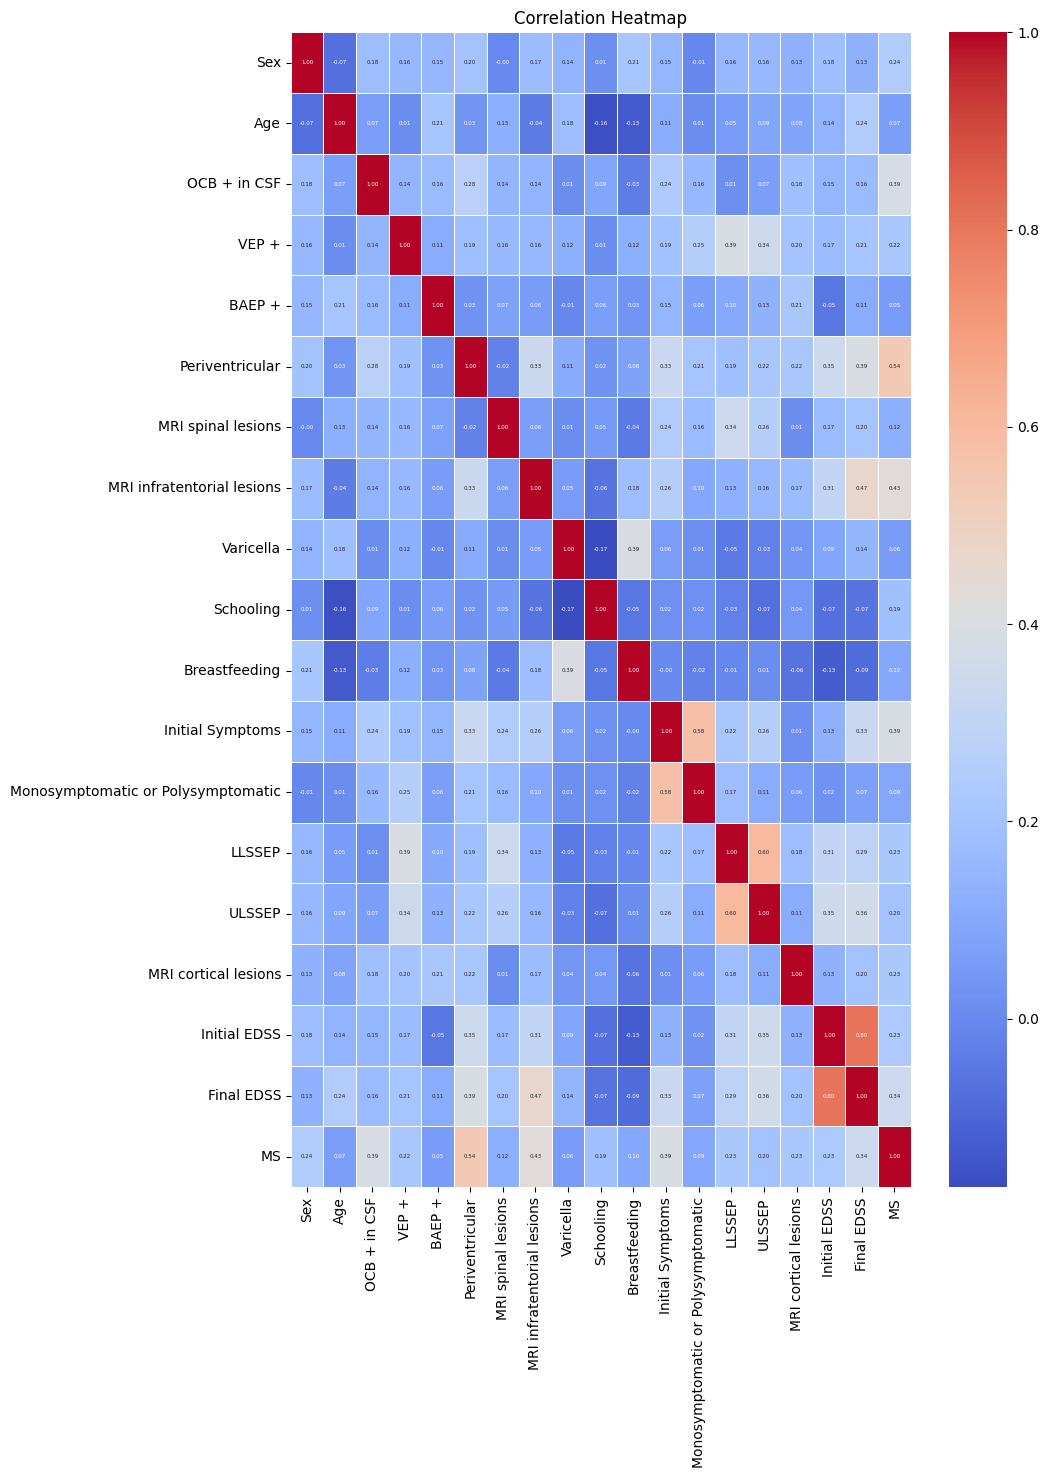

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

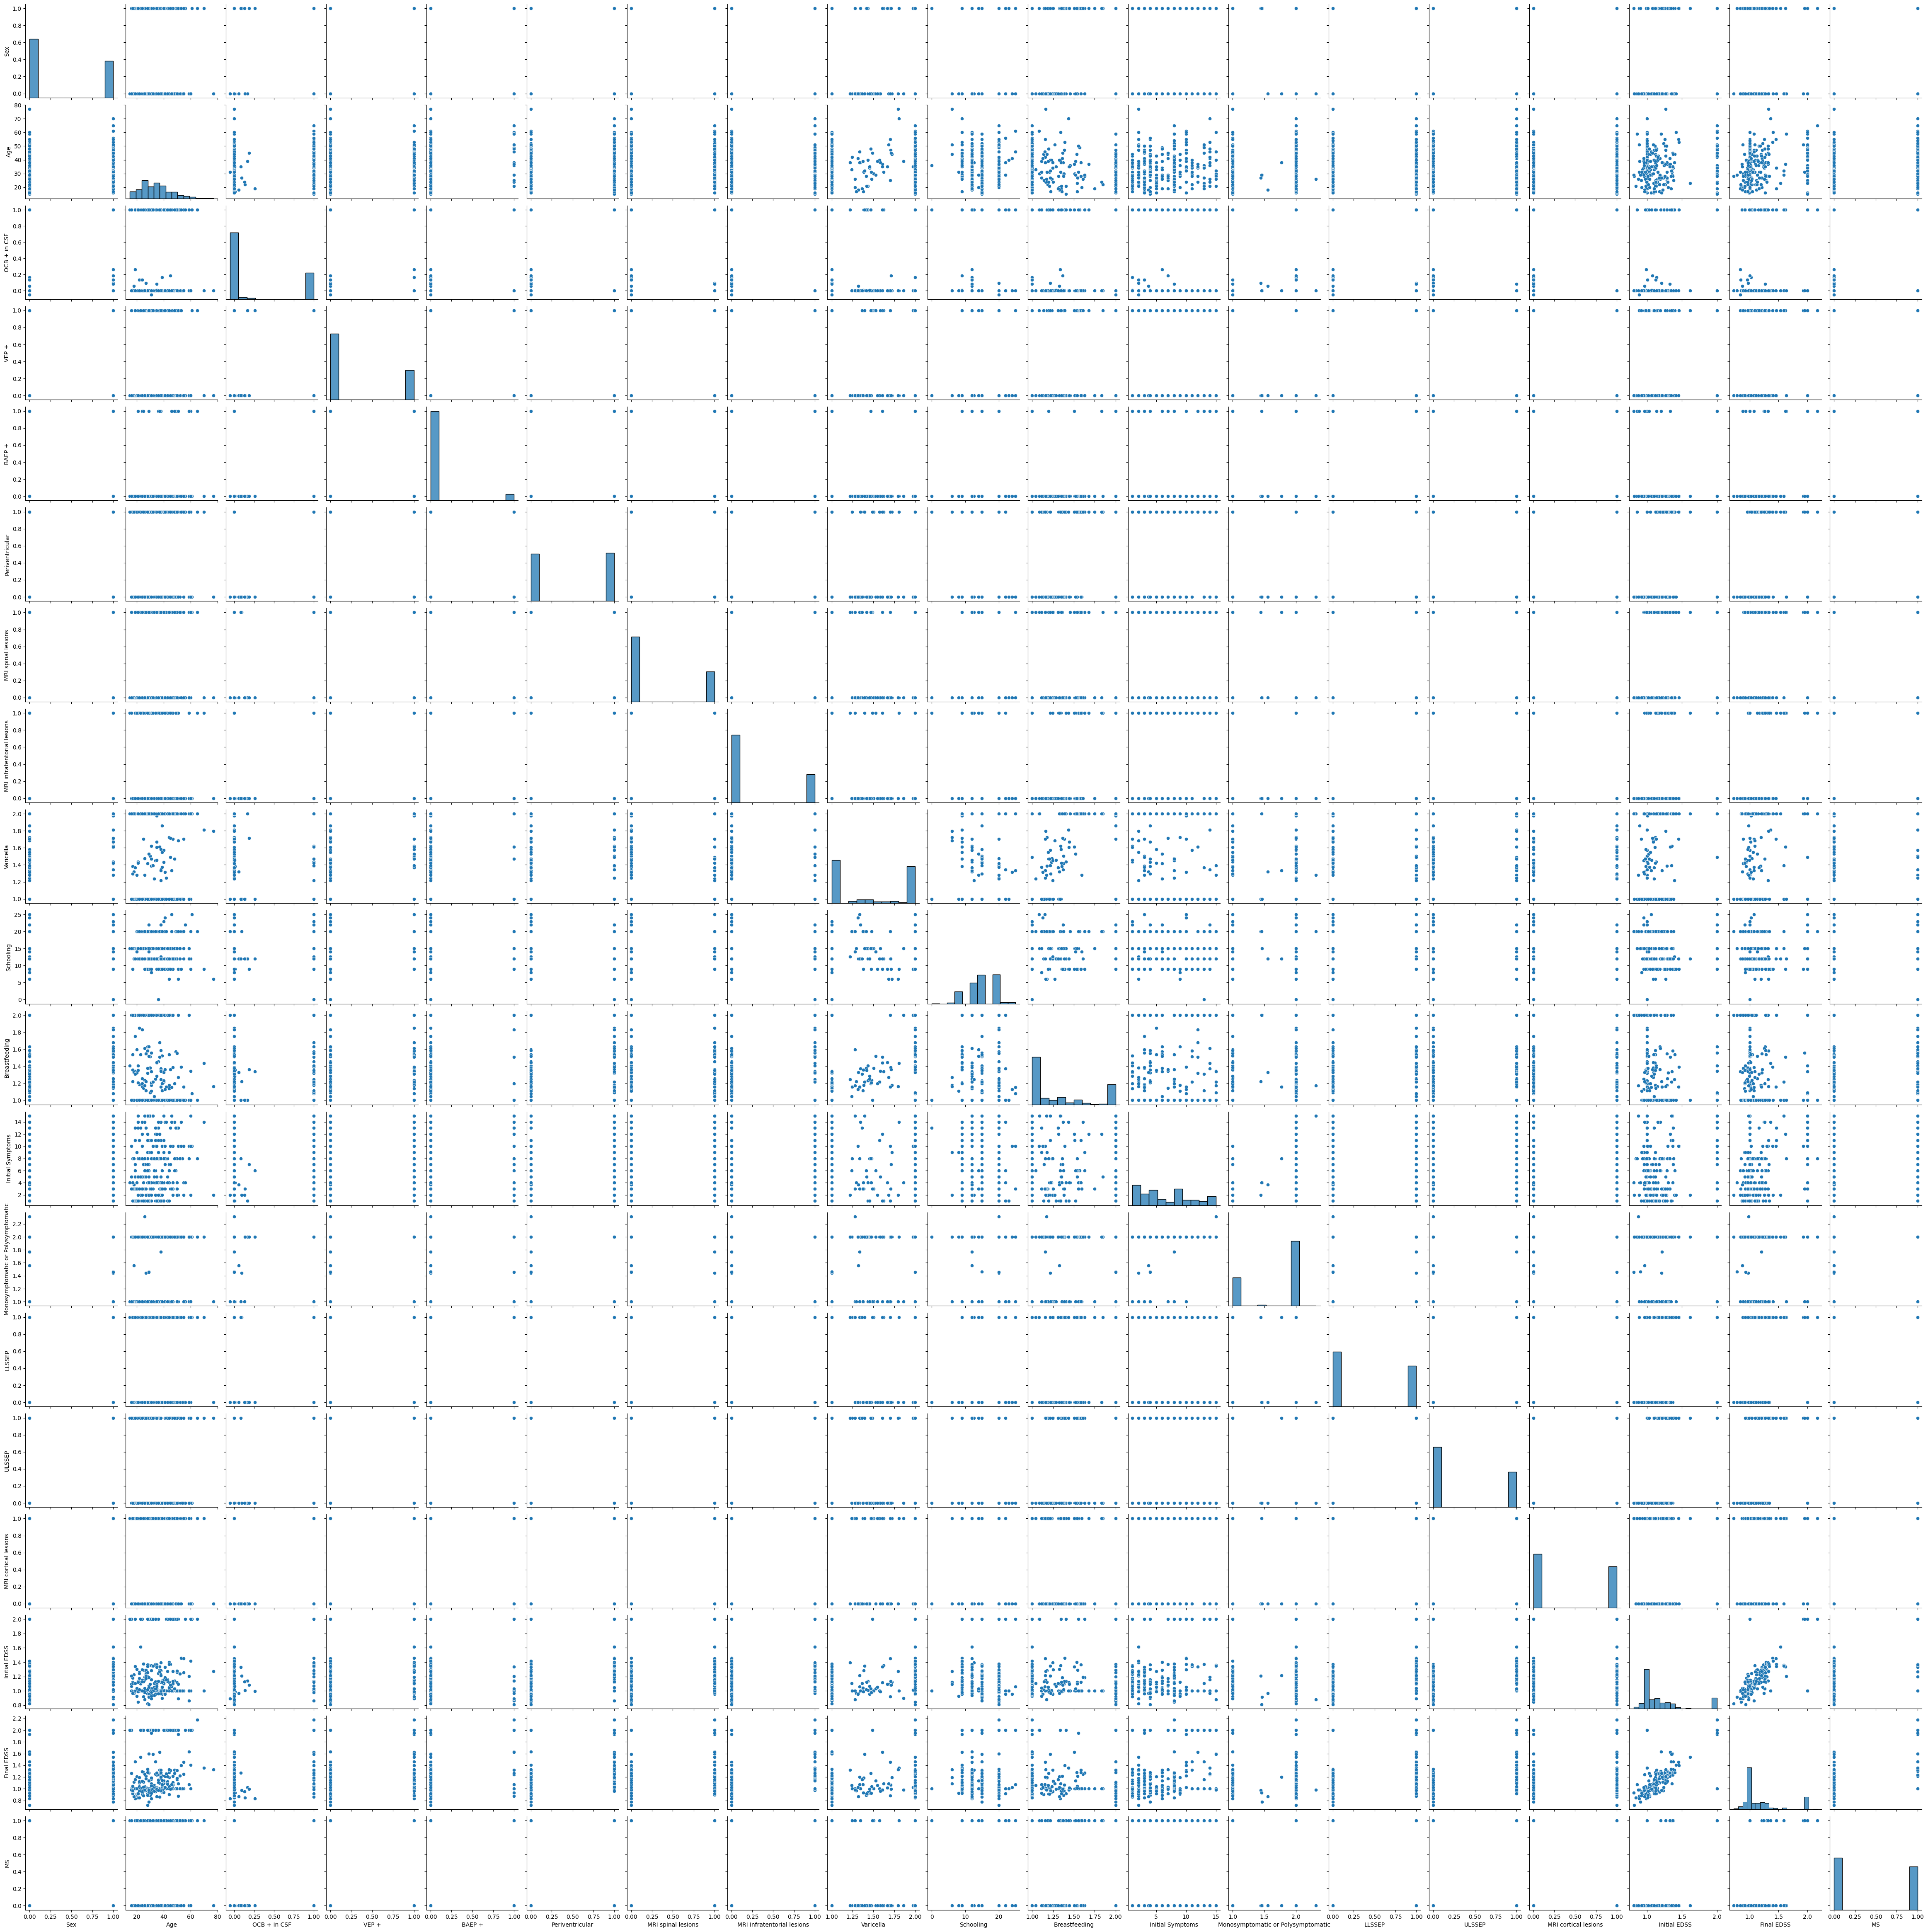

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Features with multicollinearity (absolute correlation coefficient > 0.7):
Initial EDSS - Final EDSS


Specify features and target variable

In [8]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 18)
(272,)


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


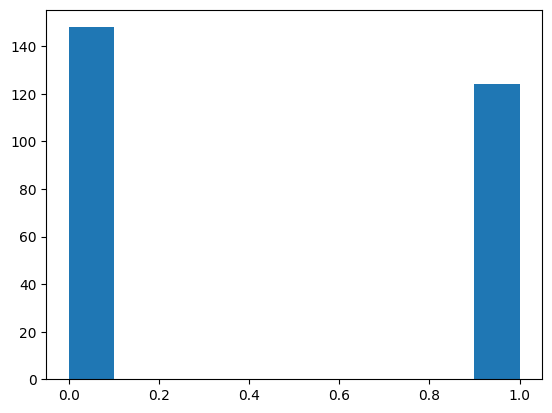

The baseline accuracy is: 0.5441176470588235


In [10]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
plt.figure()
y.hist(grid=False)
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)#

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 18)
x_test: (55, 18)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
#Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in lr_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Logistic Regression model
    lr = LogisticRegression(random_state=1)

    # Create an instance of GridSearchCV for Logistic Regression Classifier
    lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

    # Fit GridSearchCV on the training fold
    lr_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_lr_model = lr_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", lr_cv.best_params_)
    print("F1 Score:", lr_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_lr_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8379831932773107


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.7981512605042017


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8332773109243699


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 5.0, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg'}
F1 Score: 0.8561344537815125
Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg'}
F1 Score: 0.8045378151260504


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.8416257325503336
Standard Deviation of Train F1 Score: 0.024274175531894916
Average Validation F1 Score: 0.799899937460913
Standard Deviation of Validation F1 Score: 0.051233241464488745


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = lr_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       118
         1.0       0.81      0.84      0.82        99

    accuracy                           0.83       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.84      0.83      0.83       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        30
         1.0       0.88      0.84      0.86        25

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55



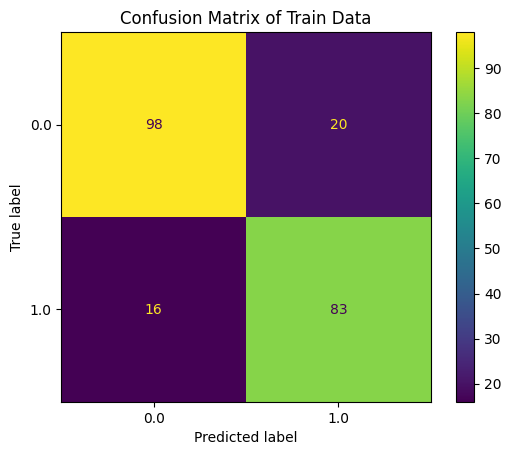

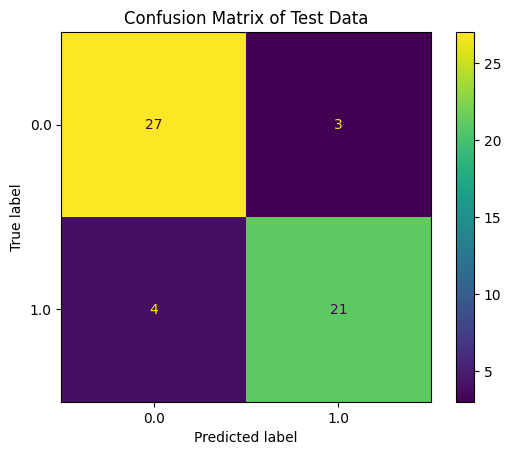

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')
plt.show()

# Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')
plt.show()


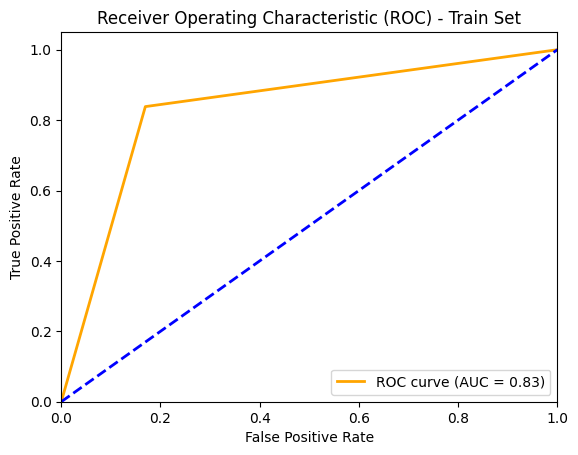

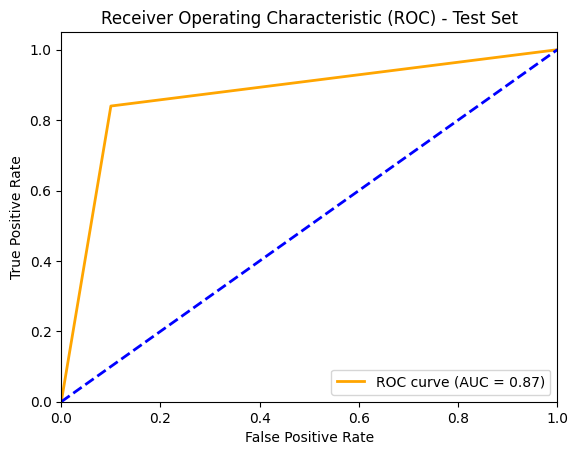

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.42987
Age: 0.02546
OCB + in CSF: 1.23029
VEP +: 0.31709
BAEP +: -1.23372
Periventricular: 1.57125
MRI spinal lesions: 0.19523
MRI infratentorial lesions: 1.41664
Varicella: -0.10317
Schooling: 0.16210
Breastfeeding: -0.47847
Initial Symptoms: 0.18010
Monosymptomatic or Polysymptomatic: -0.94132
LLSSEP: 0.85333
ULSSEP: -0.22254
MRI cortical lesions: 0.38452
Initial EDSS: -0.33395
Final EDSS: 0.21424


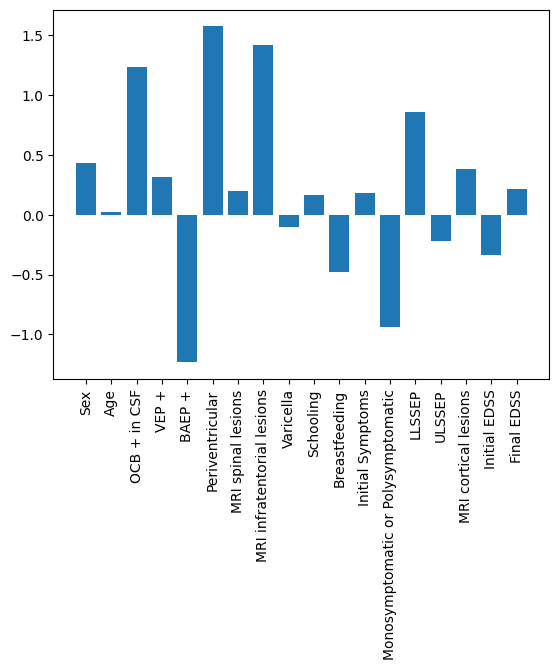

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#2. Using All Except Multicollinear Features

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
267                   0                           0        1.0        8.0   
268                   1                           0        NaN       15.0   
269                   1                           0        NaN       12.0   
270                   0                           1        NaN       15.0   
271                   0                           0        NaN        6.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
267            NaN               9.0                                 2.0   
268            NaN               5.0                                 2.0   
269            NaN              13.0                                 2.0   
270            NaN              15.0                                 2.0   
271            NaN               2.0                                 1.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
267       0       0                     0           NaN         NaN   0  
268       0       0                     0           NaN         NaN   0  
269       1       1                     0           NaN         NaN   0  
270       1       1                     1           NaN         NaN   0  
271       0       1                     0           NaN         NaN   0  

[272 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Drop features with multicollinearity that also have a low correlation with target variable

In [ ]:
columns_to_drop = ["Initial EDSS", "Final EDSS"]
df.drop(columns=columns_to_drop, inplace=True)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

Correlation Matrix


Sex       Age  OCB + in CSF  \
Sex                                 1.000000 -0.074293      0.176117   
Age                                -0.074293  1.000000      0.066730   
OCB + in CSF                        0.176117  0.066730      1.000000   
VEP +                               0.156484  0.010119      0.141769   
BAEP +                              0.153455  0.208582      0.165112   
Periventricular                     0.198072  0.032043      0.276226   
MRI spinal lesions                 -0.003224  0.125208      0.144556   
MRI infratentorial lesions          0.167687 -0.042536      0.138642   
Varicella                           0.139484  0.180163      0.007728   
Schooling                           0.013184 -0.157772      0.088991   
Breastfeeding                       0.202673 -0.147342     -0.025765   
Initial Symptoms                    0.148280  0.111557      0.241027   
Monosymptomatic or Polysymptomatic -0.009746  0.007645      0.161764   
LLSSEP                              0.156063  0.054780      0.012703   
ULSSEP                              0.156472  0.088285      0.066059   
MRI cortical lesions                0.128735  0.082606      0.183846   
MS                                  0.244609  0.065317      0.387229   

                                       VEP +    BAEP +  Periventricular  \
Sex                                 0.156484  0.153455         0.198072   
Age                                 0.010119  0.208582         0.032043   
OCB + in CSF                        0.141769  0.165112         0.276226   
VEP +                               1.000000  0.110155         0.186072   
BAEP +                              0.110155  1.000000         0.027622   
Periventricular                     0.186072  0.027622         1.000000   
MRI spinal lesions                  0.161574  0.073435        -0.020814   
MRI infratentorial lesions          0.162317  0.055369         0.334149   
Varicella                           0.119516 -0.009845         0.106892   
Schooling                           0.007360  0.062737         0.022614   
Breastfeeding                       0.110753  0.030561         0.057710   
Initial Symptoms                    0.191184  0.146679         0.329752   
Monosymptomatic or Polysymptomatic  0.254407  0.063104         0.205623   
LLSSEP                              0.389002  0.099386         0.186942   
ULSSEP                              0.342720  0.132116         0.215023   
MRI cortical lesions                0.201650  0.214592         0.216116   
MS                                  0.218986  0.053275         0.539532   

                                    MRI spinal lesions  \
Sex                                          -0.003224   
Age                                           0.125208   
OCB + in CSF                                  0.144556   
VEP +                                         0.161574   
BAEP +                                        0.073435   
Periventricular                              -0.020814   
MRI spinal lesions                            1.000000   
MRI infratentorial lesions                    0.064307   
Varicella                                     0.008979   
Schooling                                     0.052551   
Breastfeeding                                -0.036710   
Initial Symptoms                              0.242933   
Monosymptomatic or Polysymptomatic            0.163364   
LLSSEP                                        0.340903   
ULSSEP                                        0.262916   
MRI cortical lesions                          0.011027   
MS                                            0.123734   

                                    MRI infratentorial lesions  Varicella  \
Sex                                                   0.167687   0.139484   
Age                                                  -0.042536   0.180163   
OCB + in CSF                                          0.138642   0.007728   
VEP +                                   

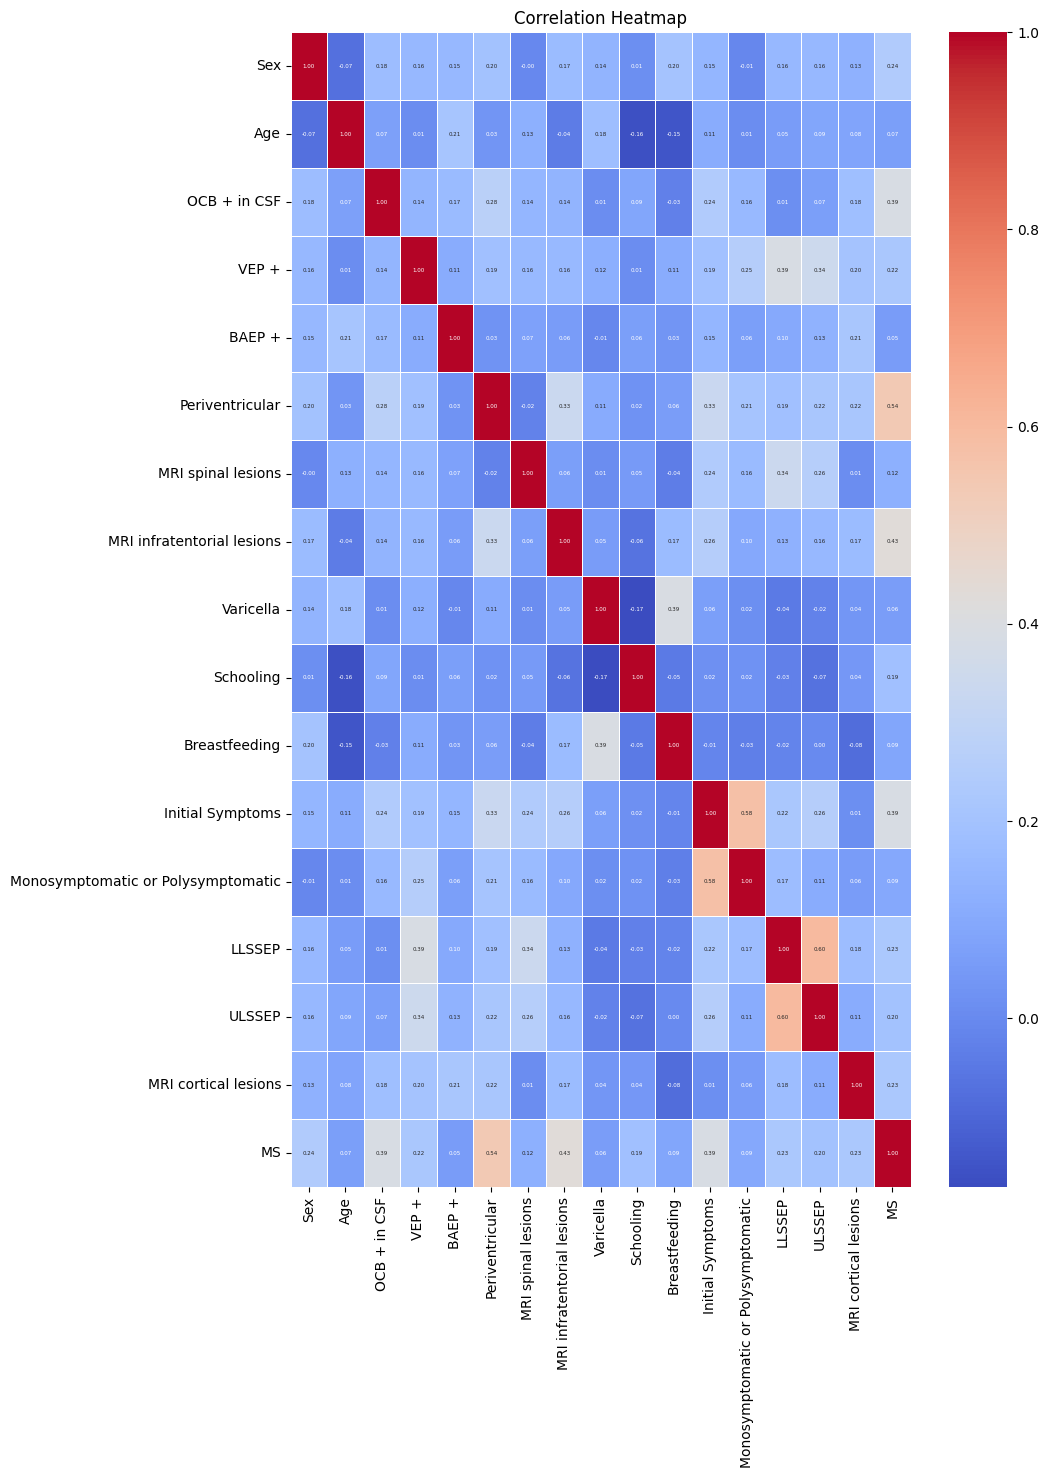

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

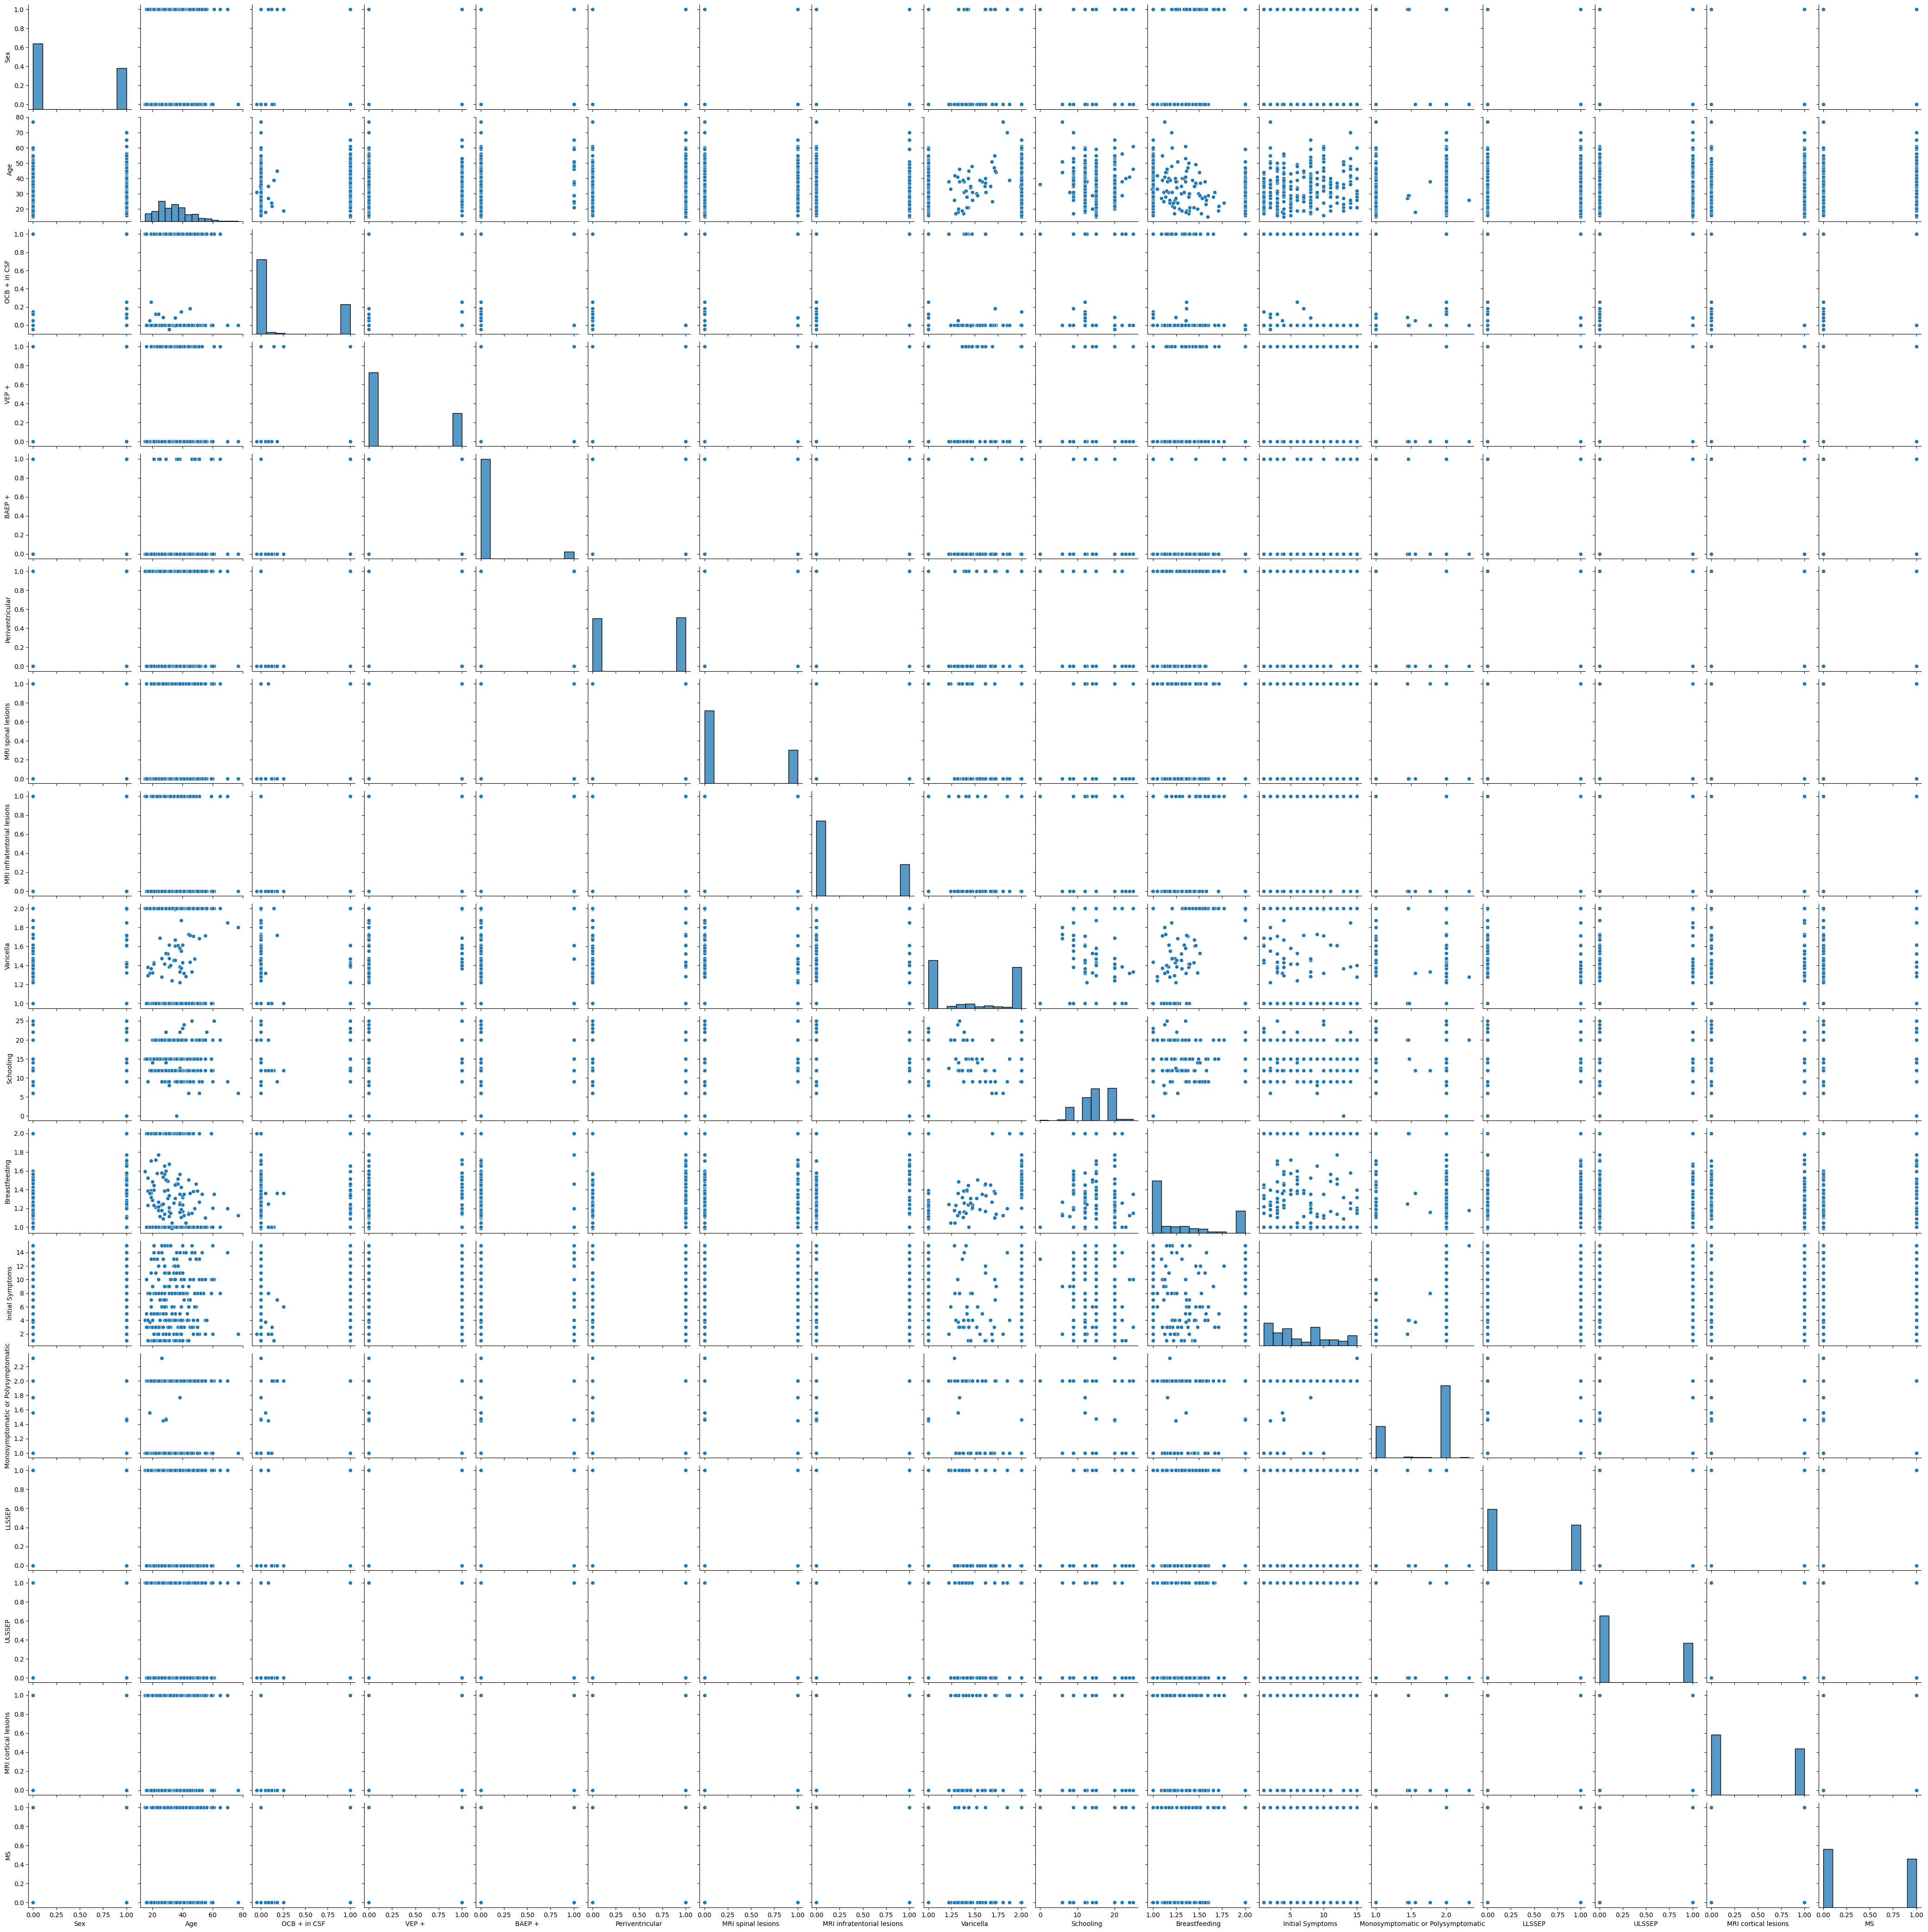

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 16)
(272,)


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


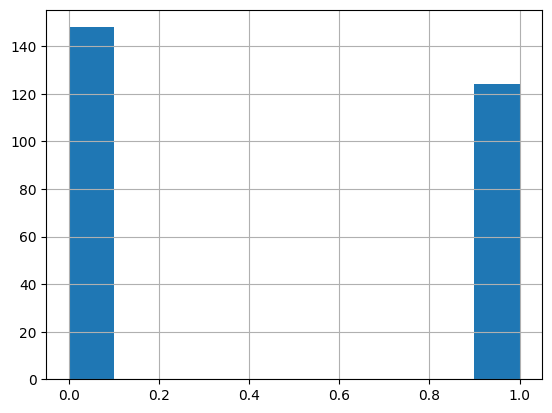

The baseline accuracy is: 0.5441176470588235


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 16)
x_test: (55, 16)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
#Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in lr_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Logistic Regression model
    lr = LogisticRegression(random_state=1)

    # Create an instance of GridSearchCV for Logistic Regression Classifier
    lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

    # Fit GridSearchCV on the training fold
    lr_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_lr_model = lr_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", lr_cv.best_params_)
    print("F1 Score:", lr_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_lr_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 5.0, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs'}
F1 Score: 0.8322689075630253


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.7979831932773109


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8277310924369748


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 5.0, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8618487394957983
Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg'}
F1 Score: 0.8045378151260504


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.8452348308005408
Standard Deviation of Train F1 Score: 0.02454029334238125
Average Validation F1 Score: 0.7930680359435174
Standard Deviation of Validation F1 Score: 0.05836743346230714


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = lr_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       118
         1.0       0.81      0.84      0.82        99

    accuracy                           0.83       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.84      0.83      0.83       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        30
         1.0       0.88      0.84      0.86        25

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

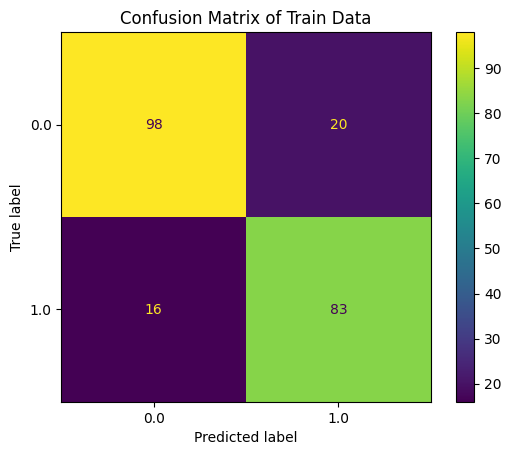

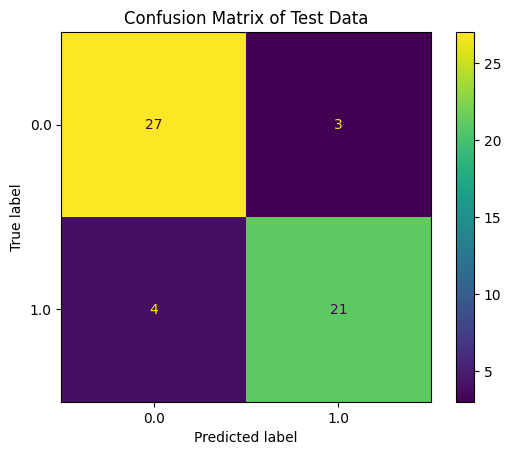

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

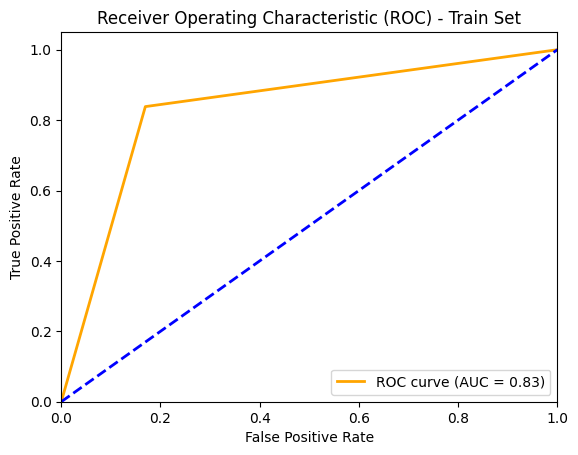

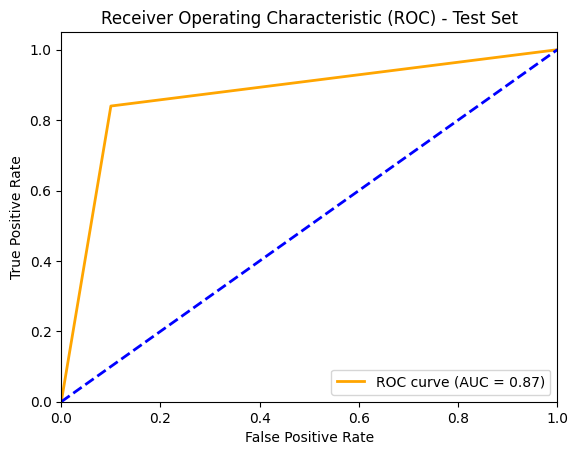

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.42414
Age: 0.02563
OCB + in CSF: 1.23713
VEP +: 0.31656
BAEP +: -1.20411
Periventricular: 1.55041
MRI spinal lesions: 0.18340
MRI infratentorial lesions: 1.43883
Varicella: -0.10942
Schooling: 0.16309
Breastfeeding: -0.52784
Initial Symptoms: 0.18130
Monosymptomatic or Polysymptomatic: -0.94480
LLSSEP: 0.85858
ULSSEP: -0.22868
MRI cortical lesions: 0.39405


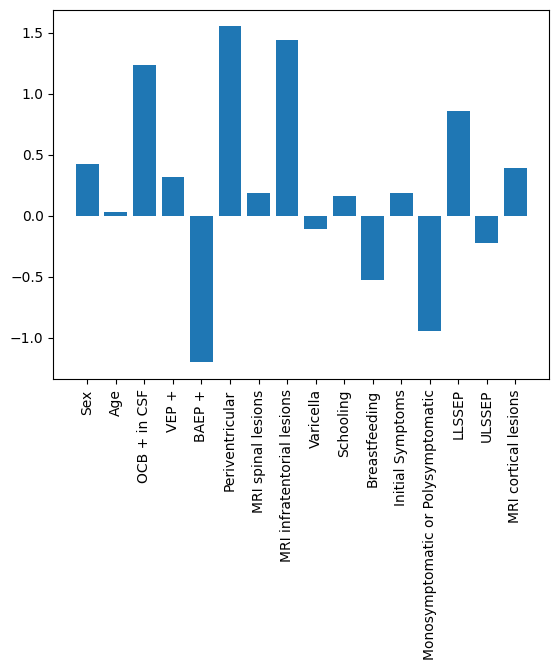

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#3. Using only important features from feature selection

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
267                   0                           0        1.0        8.0   
268                   1                           0        NaN       15.0   
269                   1                           0        NaN       12.0   
270                   0                           1        NaN       15.0   
271                   0                           0        NaN        6.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              2.0               6.0                                 2.0   
..             ...               ...                                 ...   
267            NaN               9.0                                 2.0   
268            NaN               5.0                                 2.0   
269            NaN              13.0                                 2.0   
270            NaN              15.0                                 2.0   
271            NaN               2.0                                 1.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
267       0       0                     0           NaN         NaN   0  
268       0       0                     0           NaN         NaN   0  
269       1       1                     0           NaN         NaN   0  
270       1       1                     1           NaN         NaN   0  
271       0       1                     0           NaN         NaN   0  

[272 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[[ 'Sex', 'OCB + in CSF', 'VEP +', 'Periventricular', 'MRI spinal lesions', 'MRI infratentorial lesions', 'Breastfeeding', 'LLSSEP', 'MRI cortical lesions' ]]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 9)
(272,)


Visualising Relationship between Target Variable and Each Feature in X

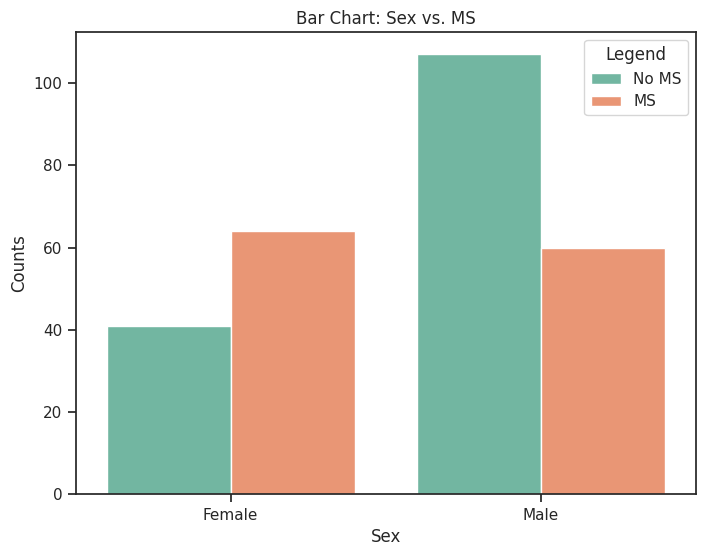

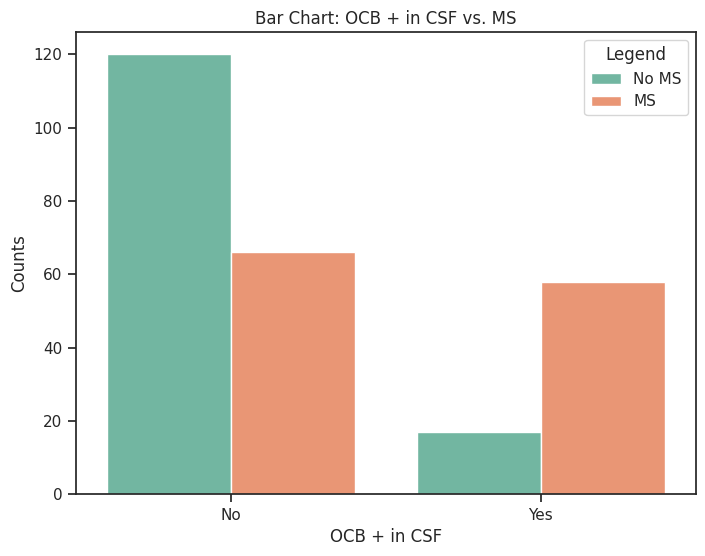

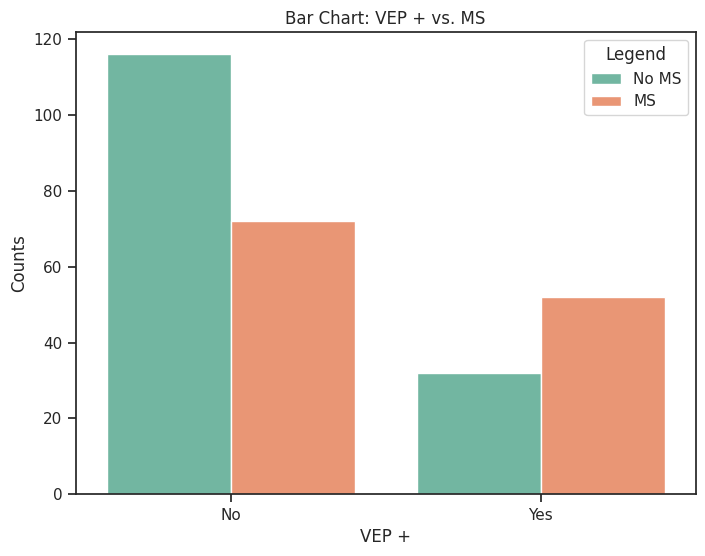

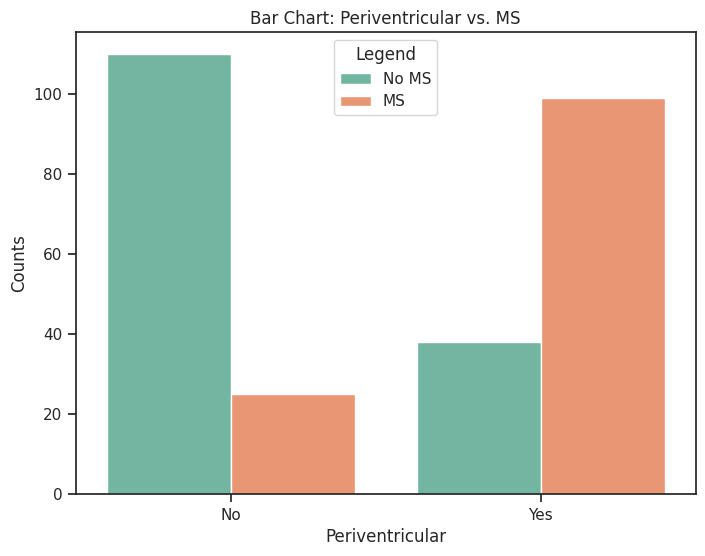

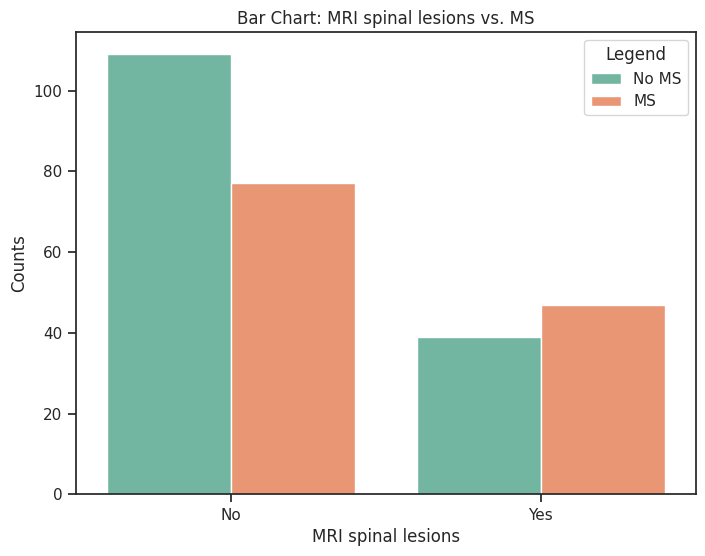

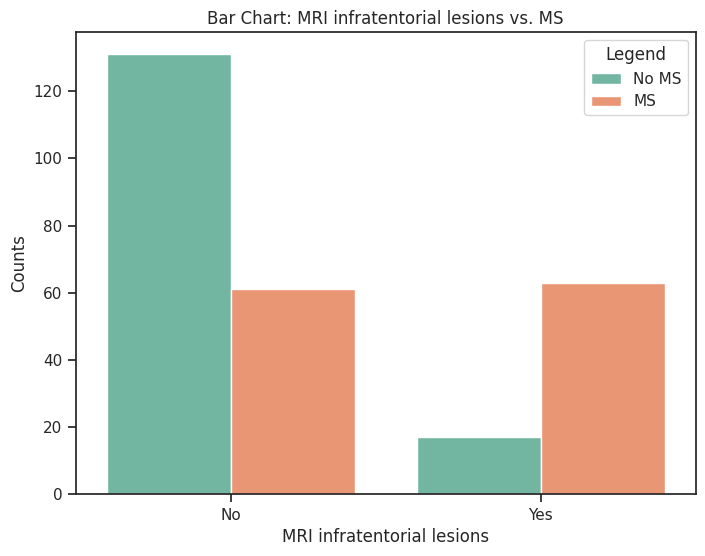

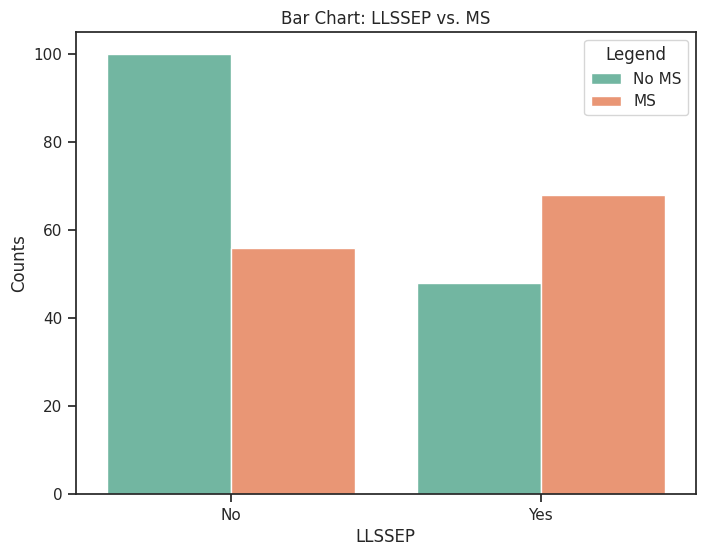

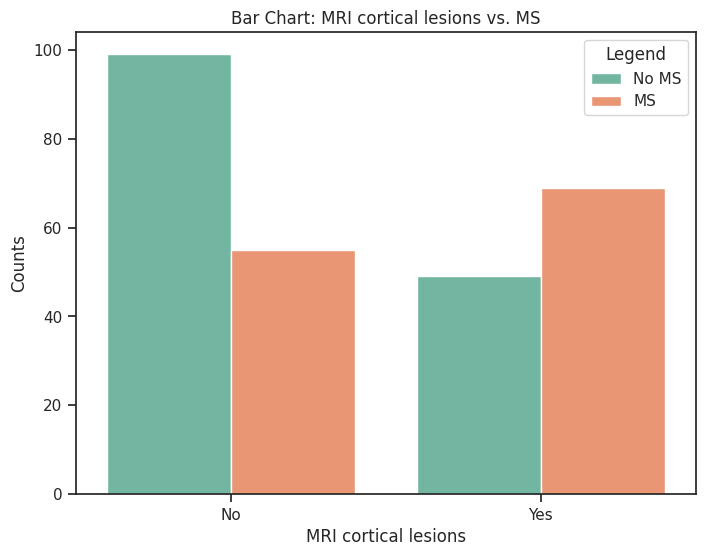

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define features to plot
features = ['Sex', 'OCB + in CSF', 'VEP +', 'Periventricular', 'MRI spinal lesions',
            'MRI infratentorial lesions', 'LLSSEP', 'MRI cortical lesions']

# Define a function to filter values to 0.0 or 1.0
def filter_values(value):
    if value == 0.0 or value == 1.0:
        return value
    else:
        return None

# Filter the data for the specified features
filtered_df = imputed_df.copy()
filtered_df[features] = filtered_df[features].applymap(filter_values)

# Modify x-axis labels for 'Sex' feature
filtered_df['Sex'] = filtered_df['Sex'].map({0.0: 'Female', 1.0: 'Male'})

# Plot Bar chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(feature)

    if feature == 'Sex':
        ax.set_xticklabels(["Female", "Male"])  # Modify x-axis labels for 'Sex' feature
    else:
        ax.set_xticklabels(["No", "Yes"])  # Modify x-axis labels for other features

    plt.title(f"Bar Chart: {feature} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


Sex  OCB + in CSF     VEP +  Periventricular  \
Sex                         1.000000      0.176182  0.156484         0.198072   
OCB + in CSF                0.176182      1.000000  0.141808         0.275639   
VEP +                       0.156484      0.141808  1.000000         0.186072   
Periventricular             0.198072      0.275639  0.186072         1.000000   
MRI spinal lesions         -0.003224      0.144302  0.161574        -0.020814   
MRI infratentorial lesions  0.167687      0.138258  0.162317         0.334149   
Breastfeeding               0.209647     -0.033890  0.117769         0.076447   
LLSSEP                      0.156063      0.012293  0.389002         0.186942   
MRI cortical lesions        0.128735      0.183323  0.201650         0.216116   
MS                          0.244609      0.386725  0.218986         0.539532   

                            MRI spinal lesions  MRI infratentorial lesions  \
Sex                                  -0.003224                    0.167687   
OCB + in CSF                          0.144302                    0.138258   
VEP +                                 0.161574                    0.162317   
Periventricular                      -0.020814                    0.334149   
MRI spinal lesions                    1.000000                    0.064307   
MRI infratentorial lesions            0.064307                    1.000000   
Breastfeeding                        -0.044002                    0.178458   
LLSSEP                                0.340903                    0.128599   
MRI cortical lesions                  0.011027                    0.167595   
MS                                    0.123734                    0.429793   

                            Breastfeeding    LLSSEP  MRI cortical lesions  \
Sex                              0.209647  0.156063              0.128735   
OCB + in CSF                    -0.033890  0.012293              0.183323   
VEP +                            0.117769  0.389002              0.201650   
Periventricular                  0.076447  0.186942              0.216116   
MRI spinal lesions              -0.044002  0.340903              0.011027   
MRI infratentorial lesions       0.178458  0.128599              0.167595   
Breastfeeding                    1.000000 -0.010482             -0.063291   
LLSSEP                          -0.010482  1.000000              0.175141   
MRI cortical lesions            -0.063291  0.175141              1.000000   
MS                               0.095774  0.225642              0.226484   

                                  MS  
Sex                         0.244609  
OCB + in CSF                0.386725  
VEP +                       0.218986  
Periventricular             0.539532  
MRI spinal lesions          0.123734  
MRI infratentorial lesions  0.429793  
Breastfeeding               0.095774  
LLSSEP                      0.225642  
MRI cortical lesions        0.226484  
MS                          1.000000

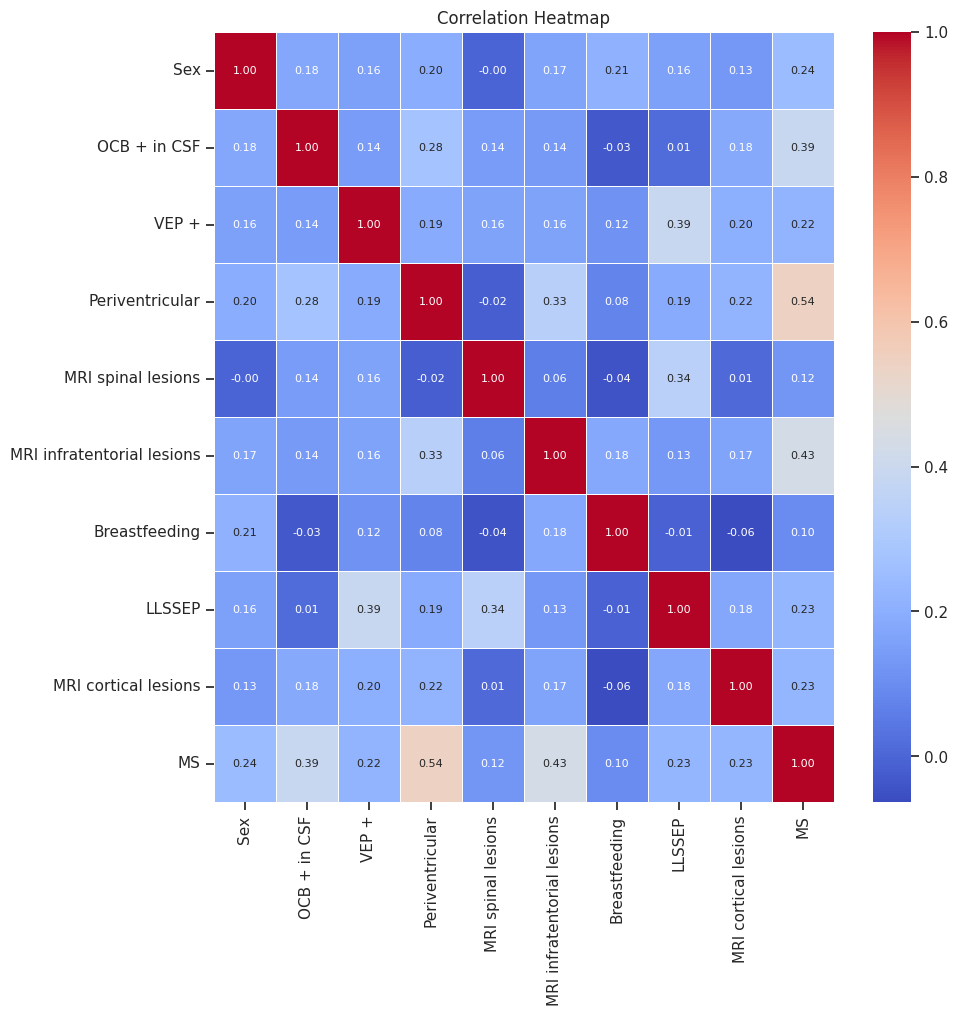

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

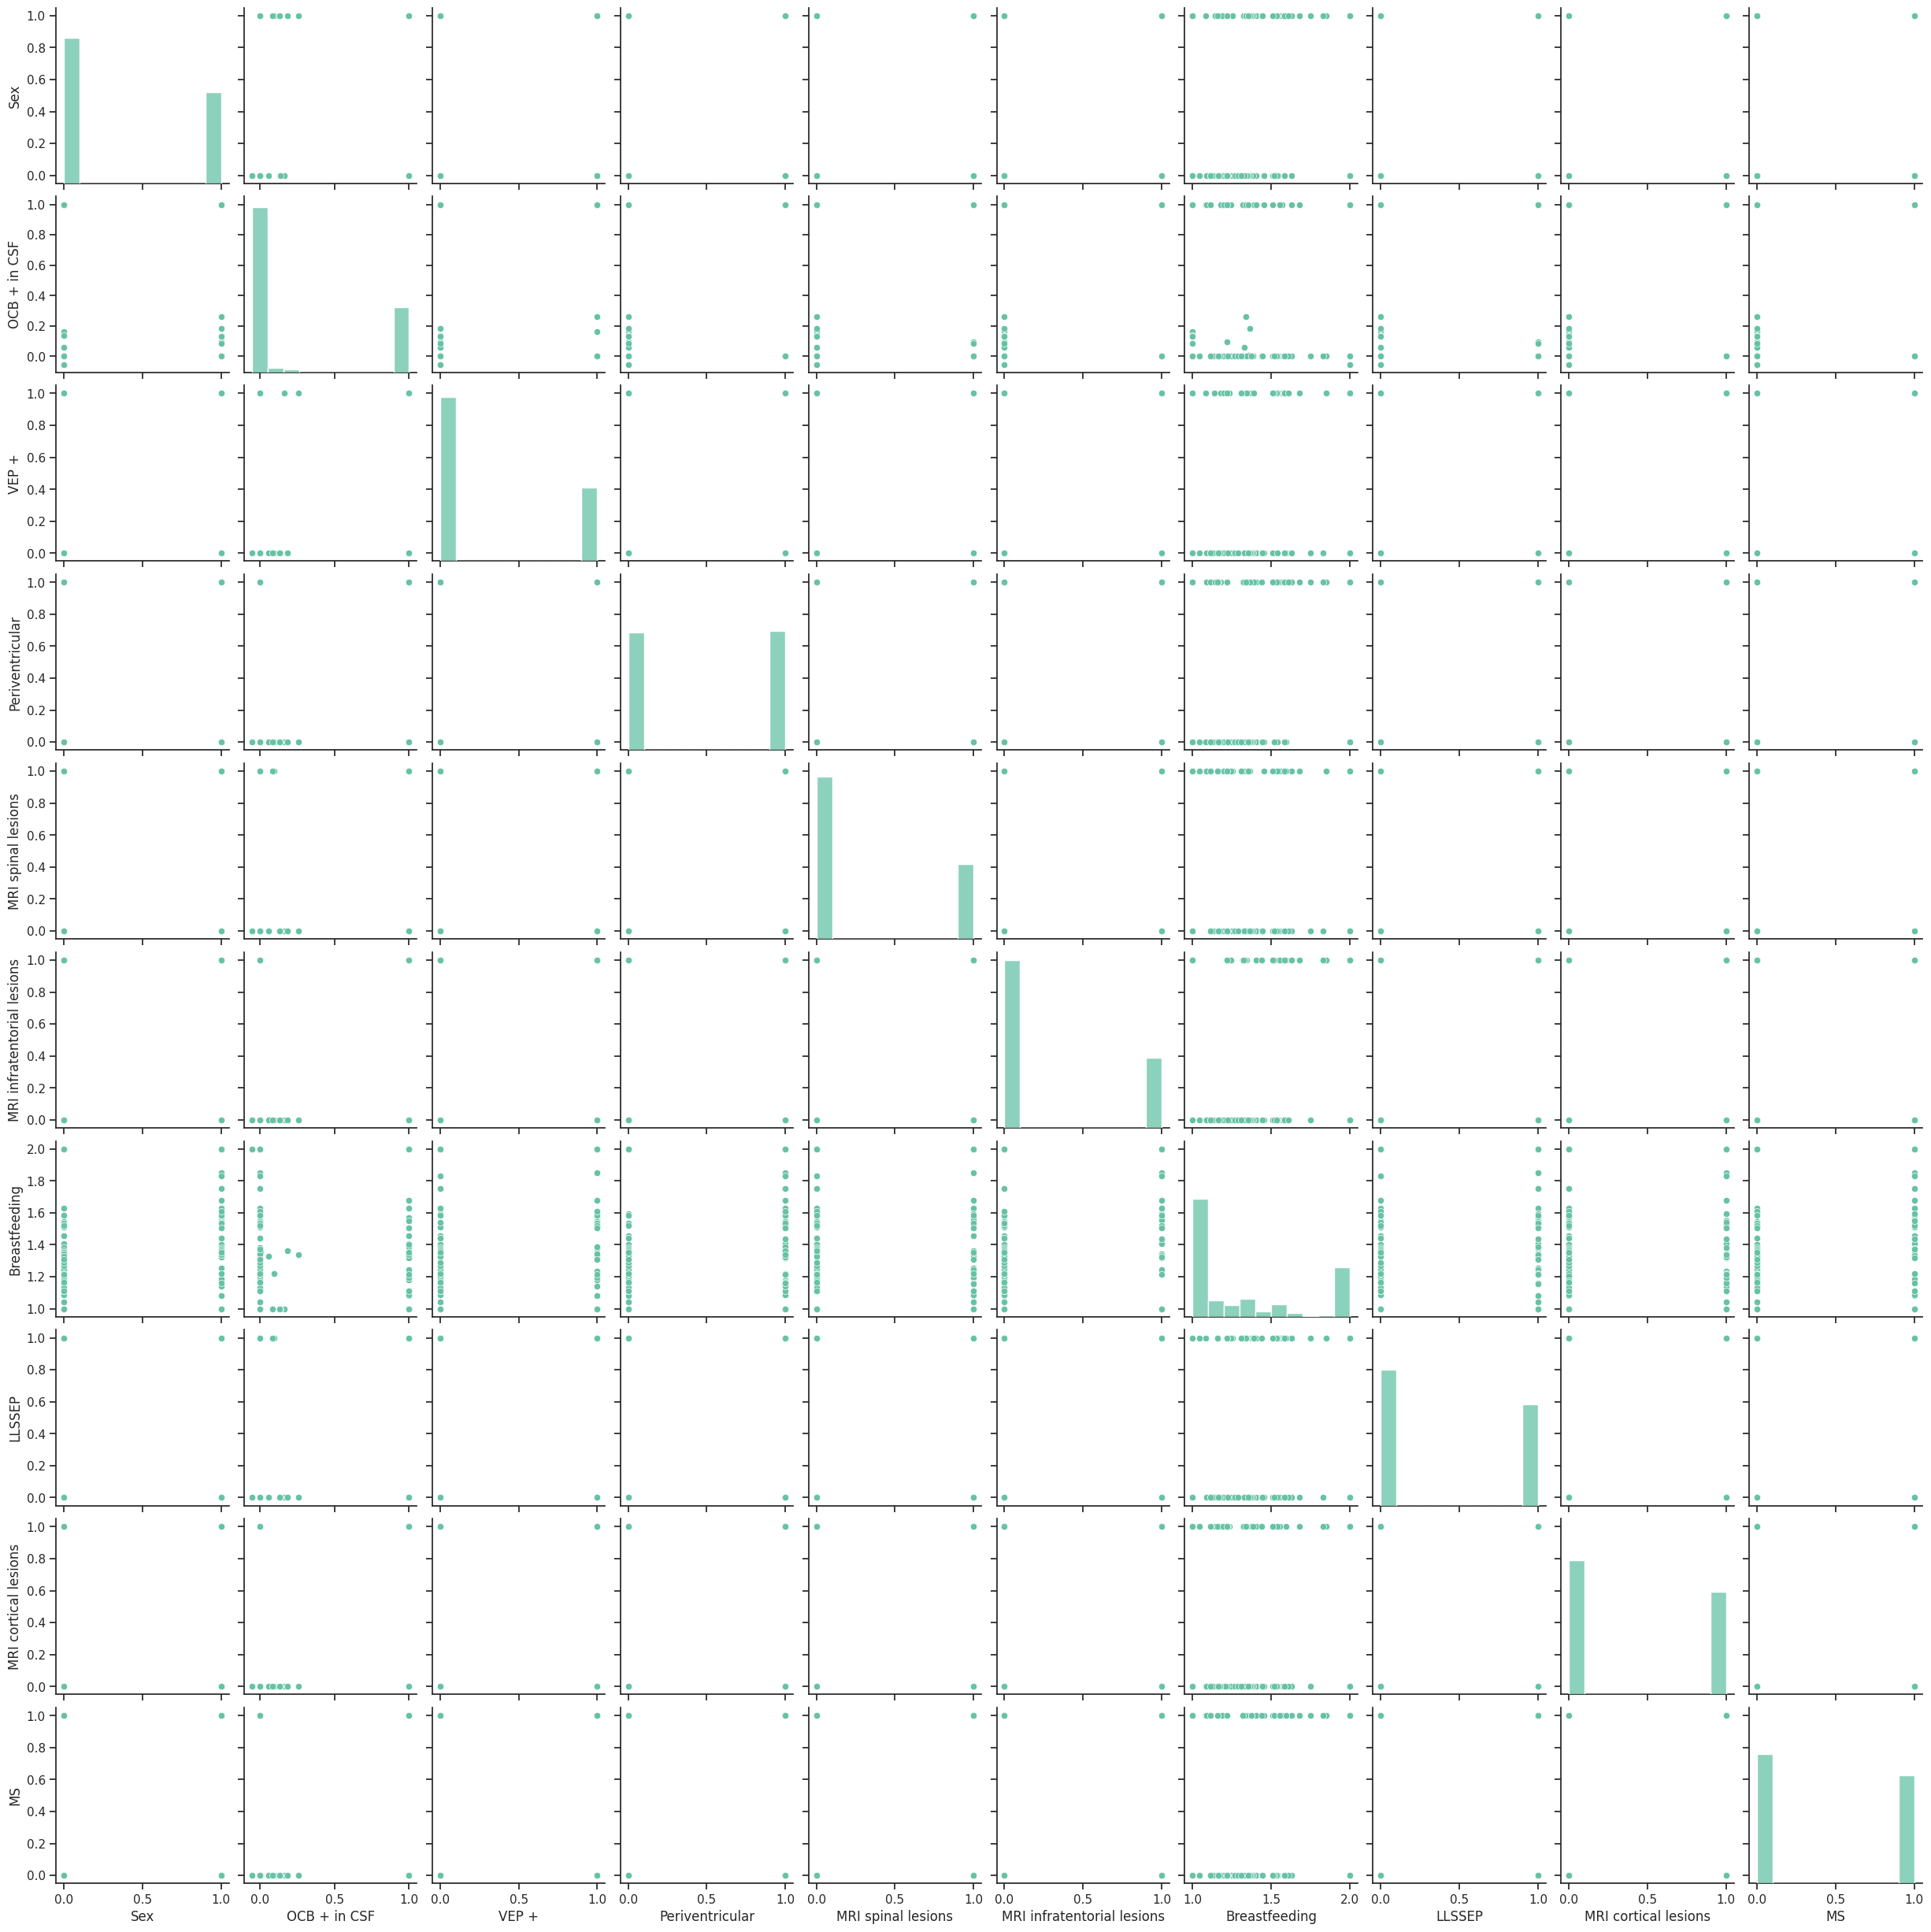

In [ ]:
#Visualise pairwise correlation as Seaborn plots
#Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Visualise plots
sns.pairplot(data)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


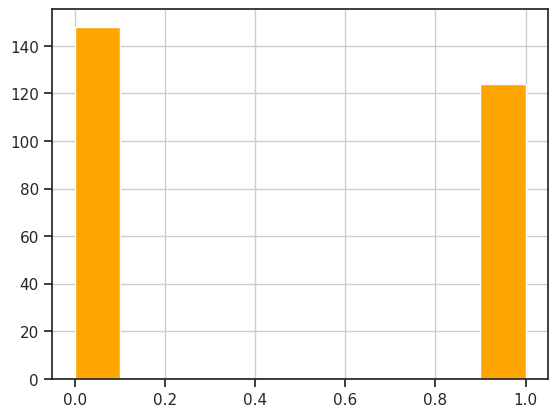

The baseline accuracy is: 0.5441176470588235


In [ ]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist(color=['orange'])
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)


##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 9)
x_test: (55, 9)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
#Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in lr_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Logistic Regression model
    lr = LogisticRegression(random_state=1)

    # Create an instance of GridSearchCV for Logistic Regression Classifier
    lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

    # Fit GridSearchCV on the training fold
    lr_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_lr_model = lr_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", lr_cv.best_params_)
    print("F1 Score:", lr_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_lr_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.5, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga'}
F1 Score: 0.8036974789915966


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.7749579831932774


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8047058823529412


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8220168067226892
Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.8045378151260504


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.7997978548254093
Standard Deviation of Train F1 Score: 0.018926798875858238
Average Validation F1 Score: 0.7745890287384594
Standard Deviation of Validation F1 Score: 0.05985654063035797


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = lr_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       118
         1.0       0.78      0.81      0.80        99

    accuracy                           0.81       217
   macro avg       0.81      0.81      0.81       217
weighted avg       0.81      0.81      0.81       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        30
         1.0       0.81      0.84      0.82        25

    accuracy                           0.84        55
   macro avg       0.83      0.84      0.84        55
weighted avg       0.84      0.84      0.84        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

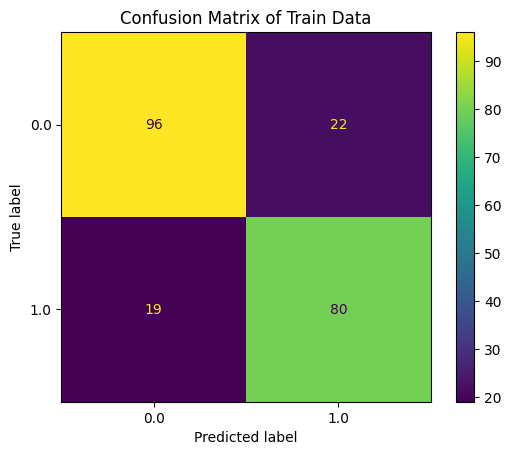

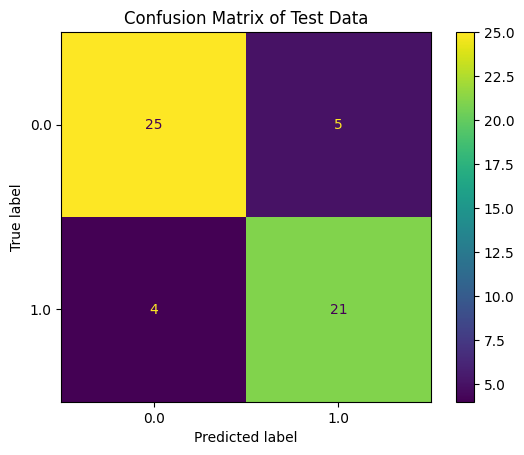

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

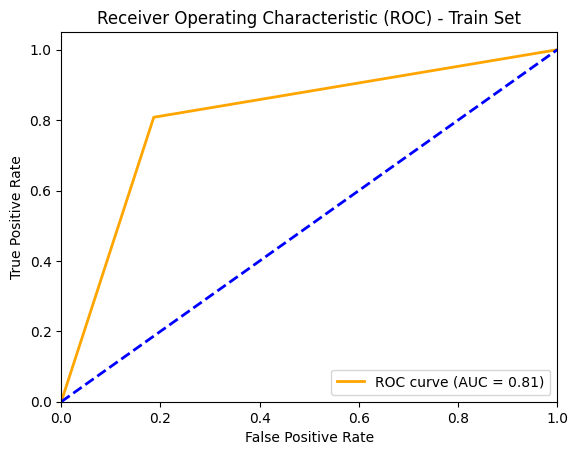

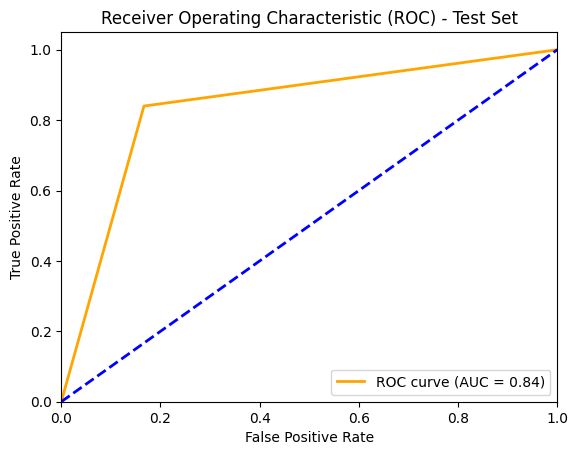

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculating Feature Importances

Sex: 0.33791
OCB + in CSF: 1.57820
VEP +: 0.00000
Periventricular: 1.34966
MRI spinal lesions: 0.00000
MRI infratentorial lesions: 1.50238
Breastfeeding: -0.20859
LLSSEP: 0.91650
MRI cortical lesions: 0.17941


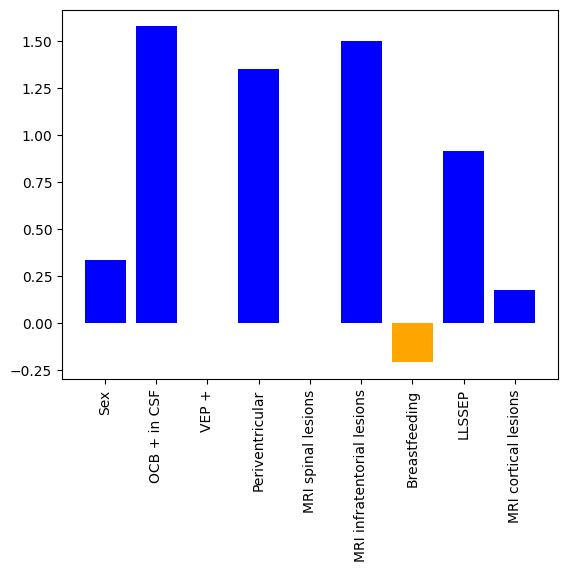

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Define colors for each bar
colors = ['blue' if v >= 0 else 'orange' for v in importance]

# Plot feature importances
plt.bar(feature_names, importance, color=colors)
plt.xticks(rotation=90)
plt.show()


#4. Using Only Predictors Identified in the Original Study

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[['MRI spinal lesions', 'OCB + in CSF', 'BAEP +']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 3)
(272,)


Visualising Relationship between Target Variable and Each Feature in X

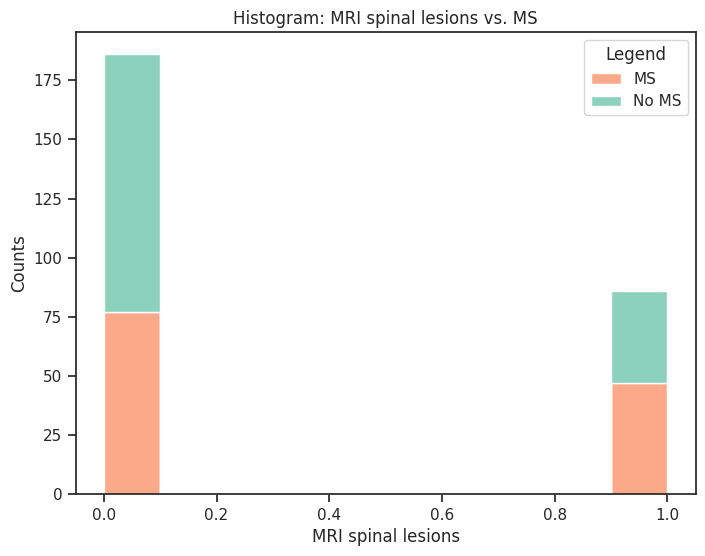

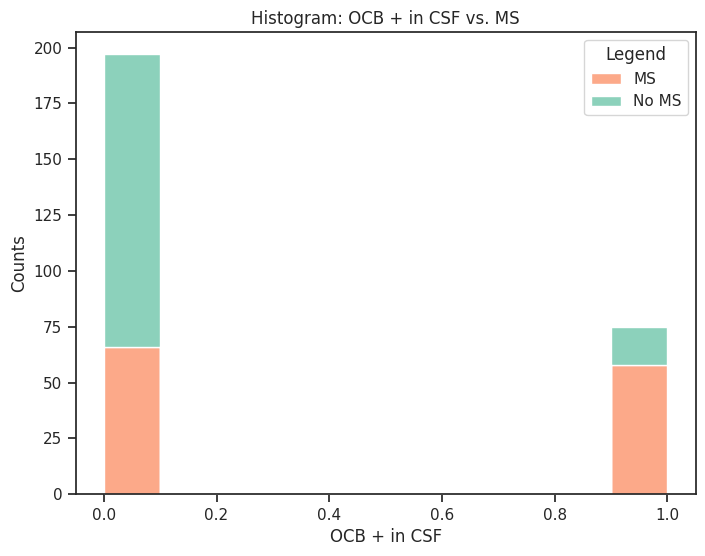

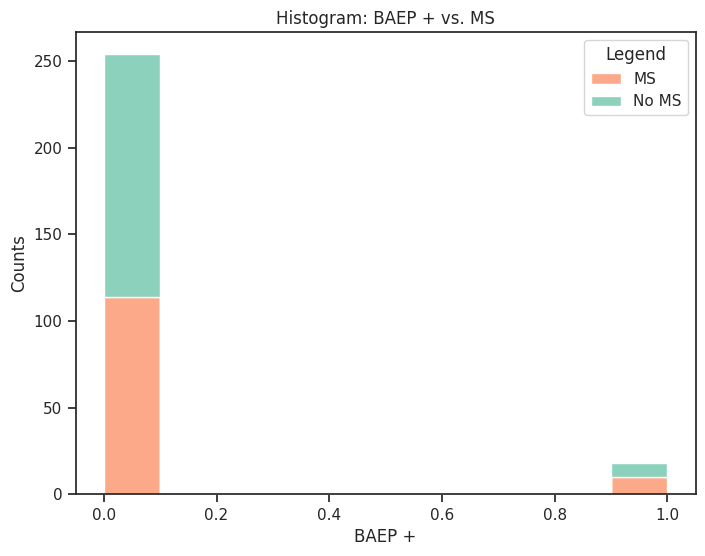

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return 0.0  # Convert any unexpected value to 0.0

# Filter the data and convert the variables to binary values
filtered_df = imputed_df.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Plot Histogram for each variable
variables = ['MRI spinal lesions', 'OCB + in CSF', 'BAEP +']

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=filtered_df, x=variable, hue='MS', element="step", multiple="stack")
    plt.xlabel(variable)
    plt.ylabel("Counts")
    plt.title(f"Histogram: {variable} vs. MS")
    plt.legend(title="Legend", labels=["MS", "No MS"])
    plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


MRI spinal lesions  OCB + in CSF    BAEP +        MS
MRI spinal lesions            1.000000      0.144302  0.073435  0.123734
OCB + in CSF                  0.144302      1.000000  0.164978  0.386725
BAEP +                        0.073435      0.164978  1.000000  0.053275
MS                            0.123734      0.386725  0.053275  1.000000

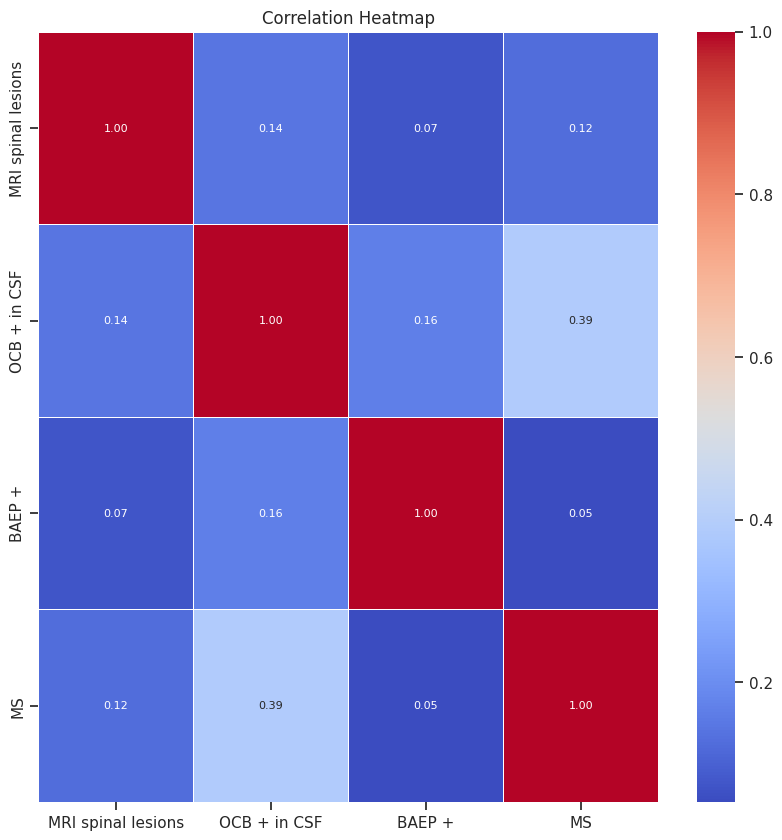

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

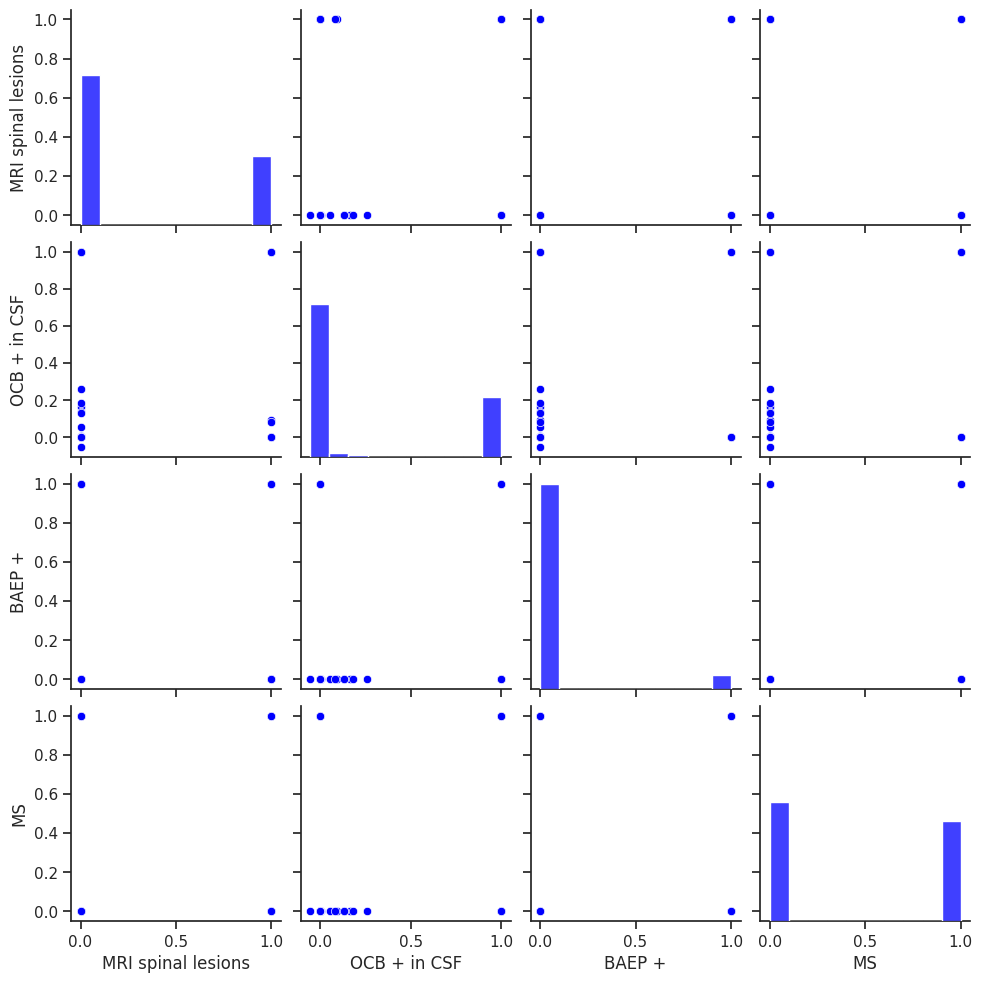

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


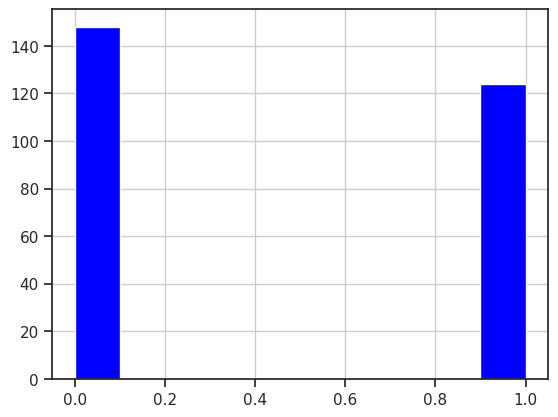

The baseline accuracy is: 0.5441176470588235


In [ ]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualize dataset imbalance
import matplotlib.pyplot as plt
y.hist(color=['blue'])
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)


##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 3)
x_test: (55, 3)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
#Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in lr_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Logistic Regression model
    lr = LogisticRegression(random_state=1)

    # Create an instance of GridSearchCV for Logistic Regression Classifier
    lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

    # Fit GridSearchCV on the training fold
    lr_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_lr_model = lr_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", lr_cv.best_params_)
    print("F1 Score:", lr_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_lr_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga'}
F1 Score: 0.71109243697479


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.6877310924369747


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.7005042016806724


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga'}
F1 Score: 0.7361344537815127
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
F1 Score: 0.689075630252101


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.5945741512072157
Standard Deviation of Train F1 Score: 0.027900733235382662
Average Validation F1 Score: 0.5885854341736694
Standard Deviation of Validation F1 Score: 0.12226778454279695


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = lr_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       118
         1.0       0.80      0.47      0.59        99

    accuracy                           0.71       217
   macro avg       0.73      0.69      0.68       217
weighted avg       0.73      0.71      0.69       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.64      0.83      0.72        30
         1.0       0.69      0.44      0.54        25

    accuracy                           0.65        55
   macro avg       0.66      0.64      0.63        55
weighted avg       0.66      0.65      0.64        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

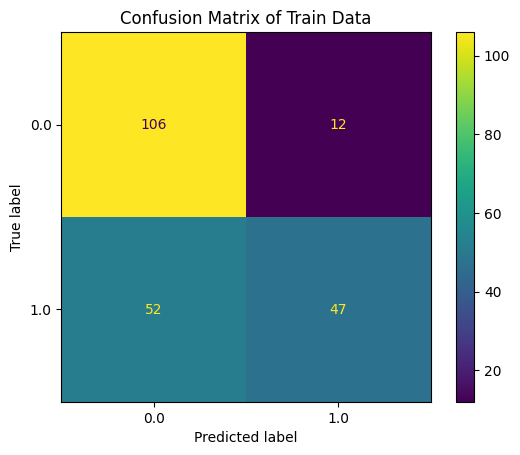

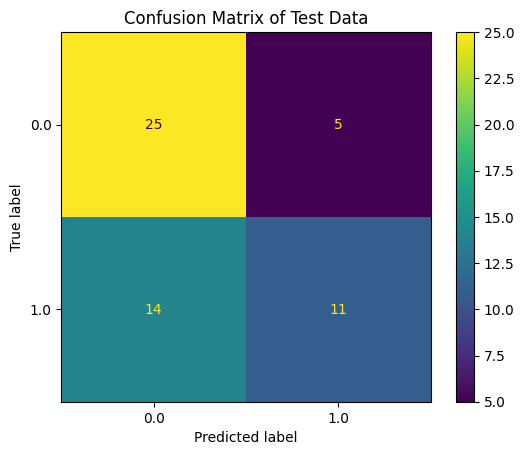

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

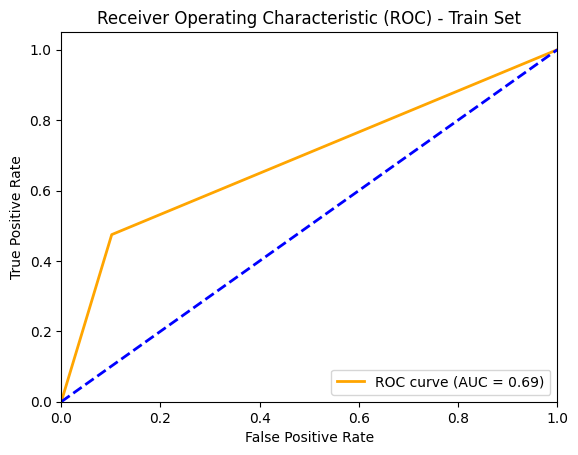

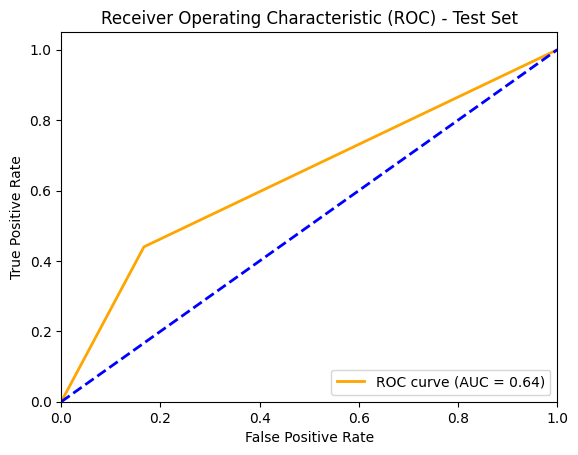

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

MRI spinal lesions: 0.08877
OCB + in CSF: 0.73484
BAEP +: -0.03716


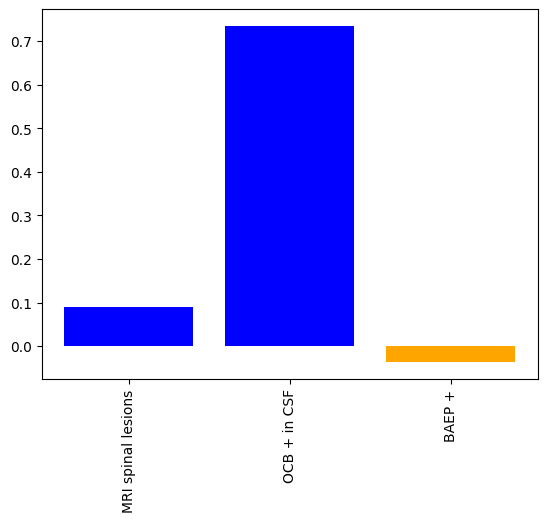

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Define colors for each bar
colors = ['blue' if v >= 0 else 'orange' for v in importance]

# Plot feature importances
plt.bar(feature_names, importance, color=colors)
plt.xticks(rotation=90)
plt.show()



#5. Testing on Mexican Dataset

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

Nr  Sex  Age  Fatigue  General weakness  Pain  Focal symptoms  \
0      2    0   56        0                 0     0               1   
1      3    0   47        0                 0     1               1   
2      4    0   43        0                 0     1               1   
3      5    0   39        0                 0     1               0   
4      6    0   61        0                 0     1               1   
..   ...  ...  ...      ...               ...   ...             ...   
133  165    0   65        0                 0     0               1   
134  166    1   61        0                 0     0               0   
135  167    0   28        0                 1     1               0   
136  169    0   22        0                 0     0               1   
137  170    0   32        0                 0     0               0   

     Cranial Nerve Symptoms  CN3  CN4  ...  Pathological CSF  \
0                         1    0    0  ...                 1   
1                         0    0    0  ...                 0   
2                         1    0    0  ...                 0   
3                         0    0    0  ...                 0   
4                         0    0    0  ...                 1   
..                      ...  ...  ...  ...               ...   
133                       0    0    0  ...                     
134                       1    1    0  ...                 1   
135                       0    0    0  ...                 0   
136                       0    0    0  ...                 0   
137                       1    0    0  ...                 1   

     Increased protein  Increased protein (g/l)  Pleocytosis  \
0                    0                     0.37            0   
1                    0                     0.28            0   
2                    0                     0.38            0   
3                                                          0   
4                    1                     0.57            0   
..                 ...                      ...          ...   
133                                         NaN                
134                  1                     0.96            1   
135                  0                     0.23            0   
136                  0                     0.16            0   
137                  0                     0.23            1   

     Pleocytosis (cells/ml)  OCB + in CSF  IgG levels in CSF  VEP +  BAEP + MS  
0                         4             0                         0       0  0  
1                         0             0               22.9      0       1  0  
2                         2                             25.3      1       0  0  
3                         1             0                                    0  
4                         0             1                         1       0  0  
..                      ...           ...                ...    ...     ... ..  
133                     NaN                                       1       0  0  
134                       6             0                117                 0  
135                       4                                       0          1  
136                       4             1               14.9      0       0  1  
137                       6             0               19.4      0          0  

[138 rows x 44 columns]

In [ ]:
# Visualise the test dataset
df_test.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                     1                           0   1  
1                     1                           0   1  
2                     0                           0   1  
3                     0                           0   1  
4                     0                           0   1  
..                  ...                         ...  ..  
267                   0                           0   0  
268                   1                           0   0  
269                   1                           0   0  
270                   0                           1   0  
271                   0                           0   0  

[272 rows x 10 columns]

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

The train dataset dimensions are: 
(138, 44)
The test dataset dimensions are: 
(272, 10)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr', 'Fatigue',	'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


In [ ]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr','VEP +', 'Periventricular', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
Age                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
Age                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [ ]:
#Specify x as train dataset (Lithuanian) and y as test dataset (Mexican)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(138, 6)
(272, 6)


Visualising Relationship between Target Variable and Each Feature in x

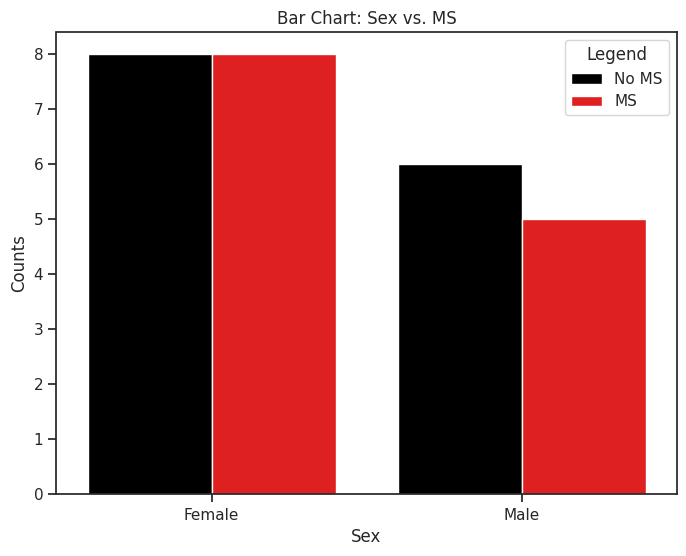

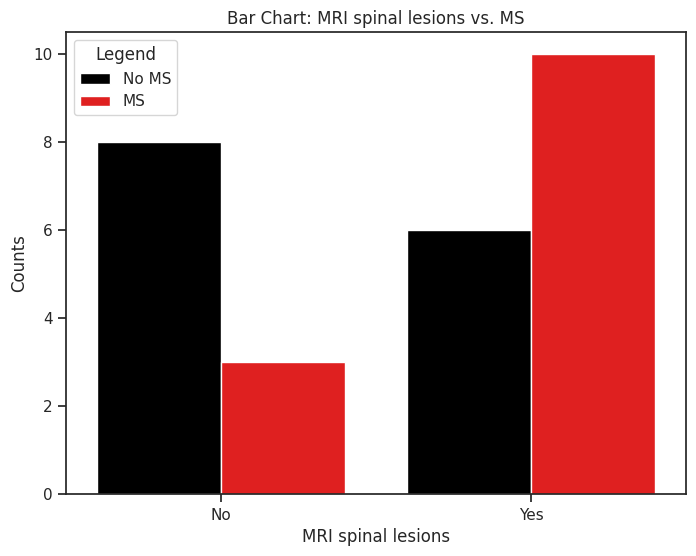

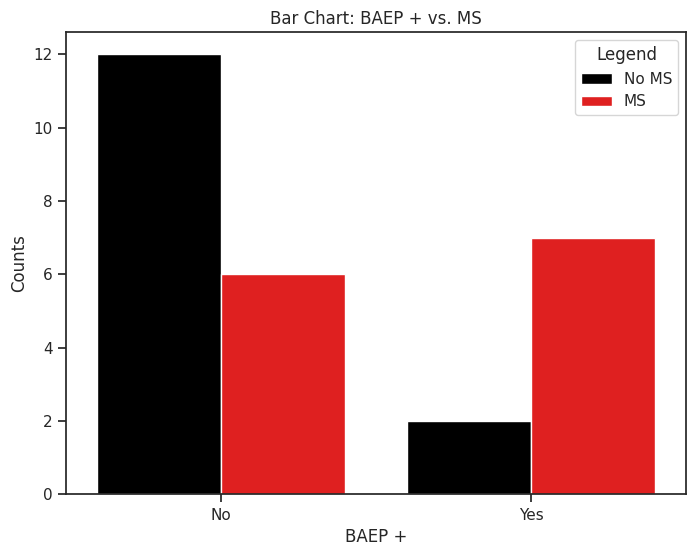

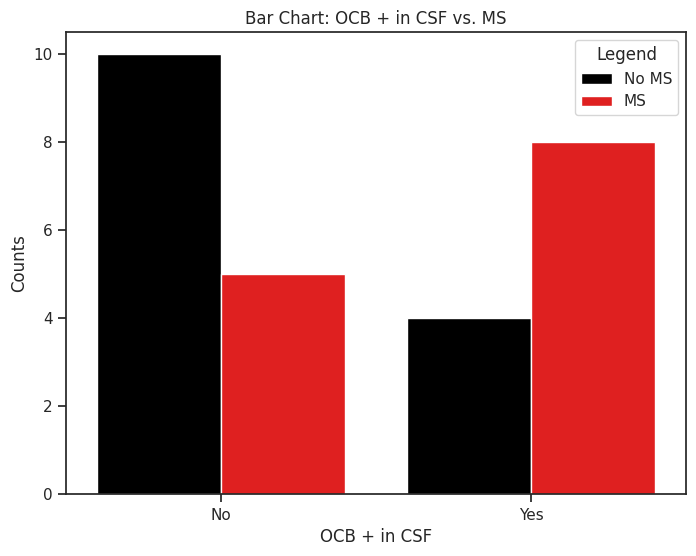

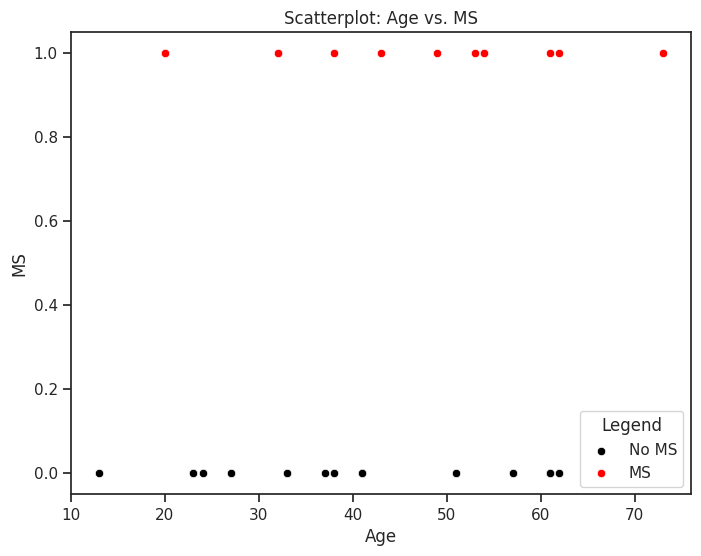

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['Sex'] = filtered_df['Sex'].apply(convert_to_binary)
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['Sex', 'MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    if variable == 'Sex':
        ax.set_xticklabels(["Female", "Male"])
    else:
        ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate scatterplots for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MS', data=filtered_df[filtered_df['MS'] == 0], color='black', label='No MS')
sns.scatterplot(x='Age', y='MS', data=filtered_df[filtered_df['MS'] == 1], color='red', label='MS')

plt.xlabel("Age")
plt.ylabel("MS")
plt.title("Scatterplot: Age vs. MS")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


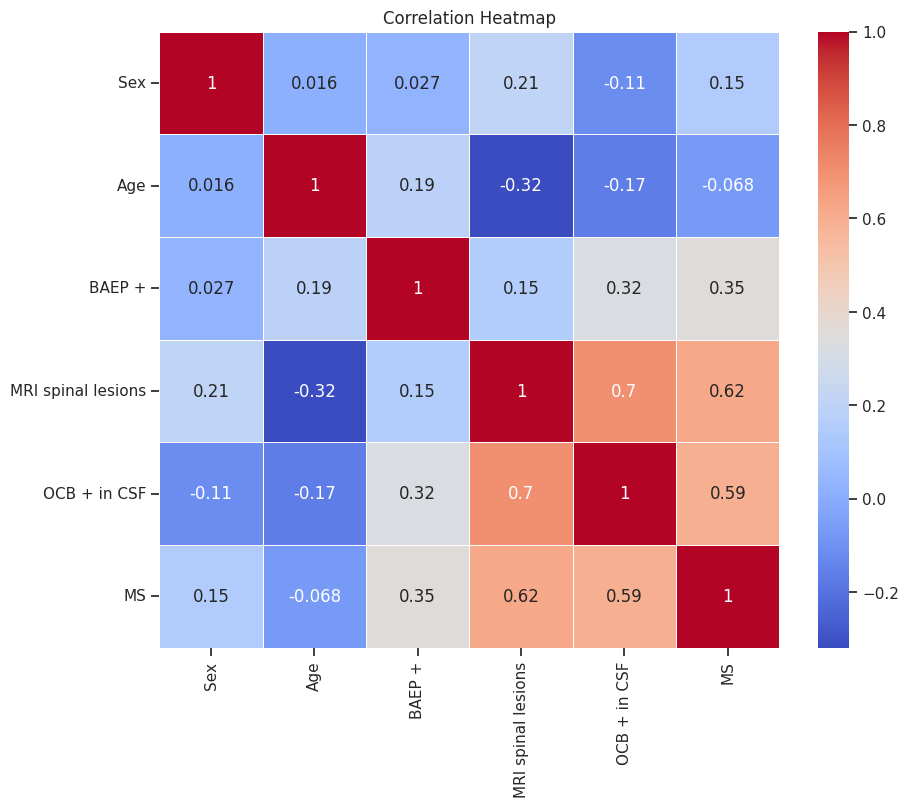

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


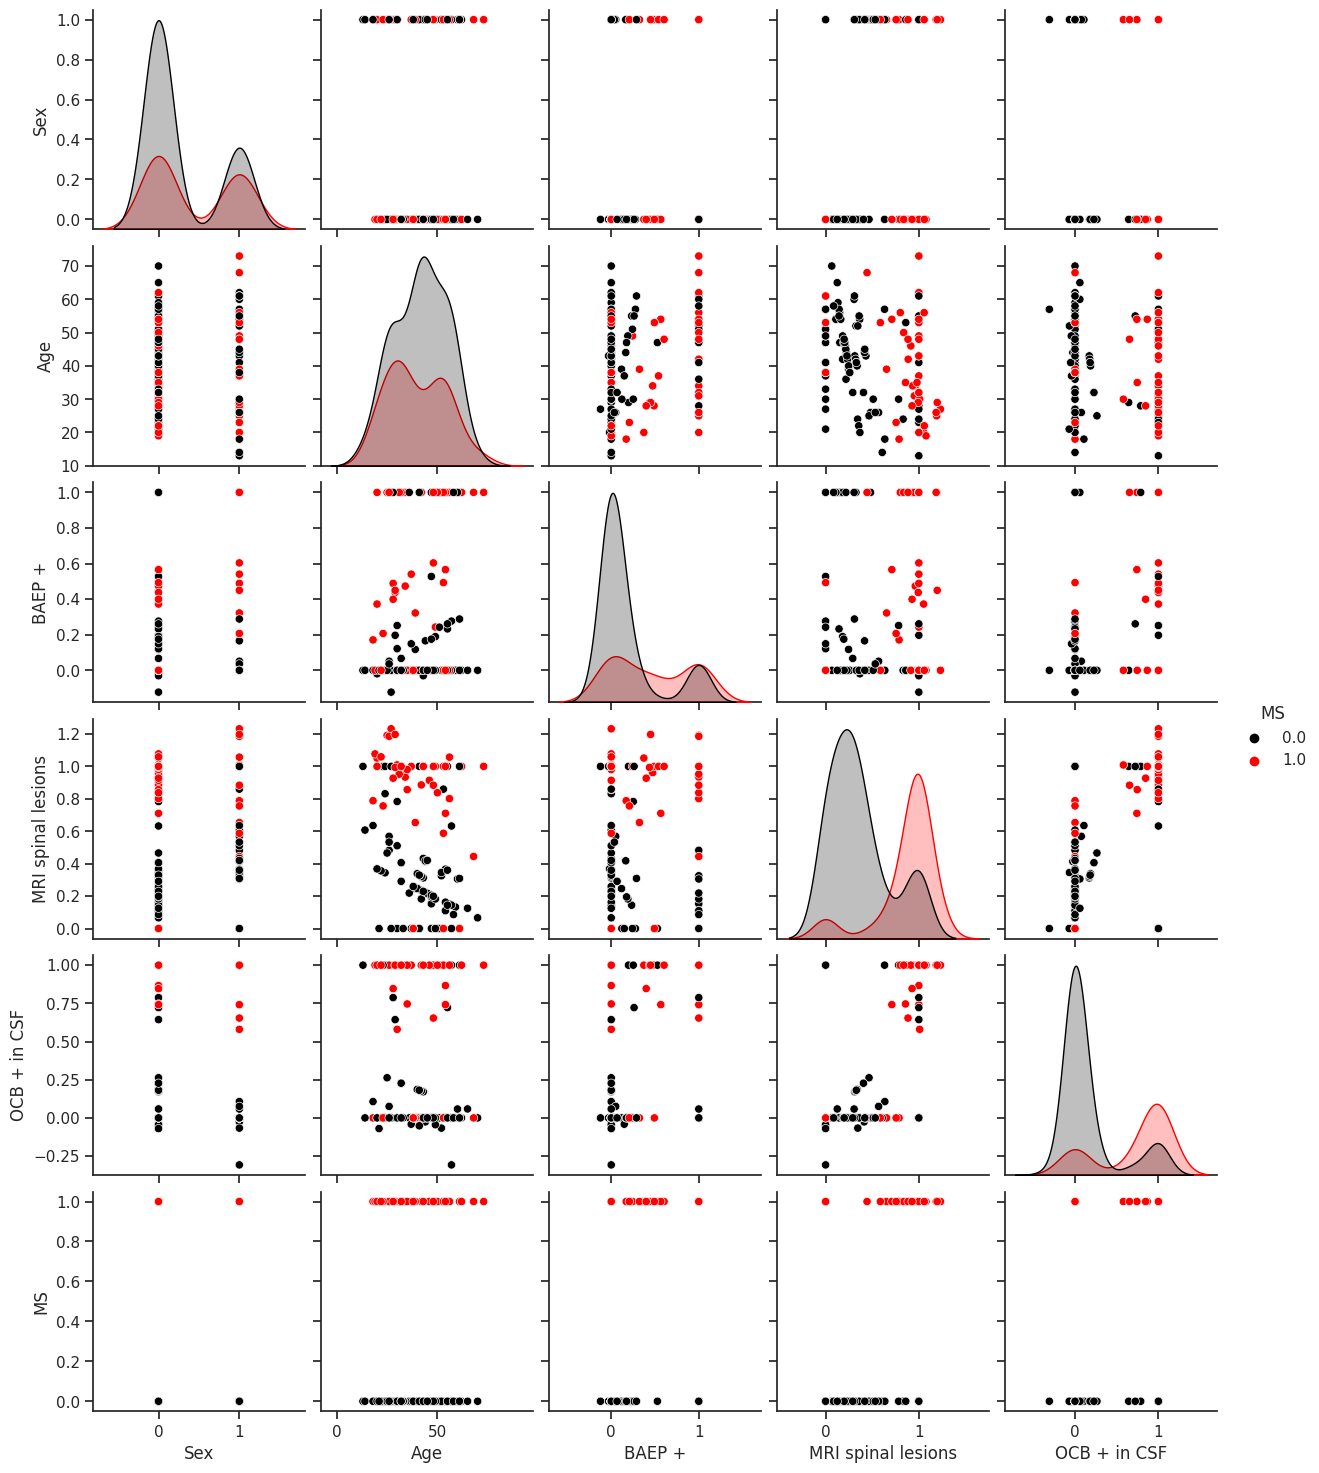

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


Features with multicollinearity (absolute correlation coefficient > 0.7):
MRI spinal lesions - OCB + in CSF


Checking for imbalanced classes in the dataset

0.0    64.492754
1.0    35.507246
Name: MS, dtype: float64


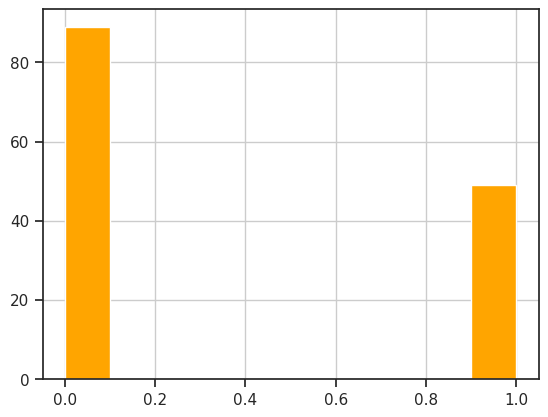

The baseline accuracy is: 0.644927536231884


In [ ]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Cross-validation

In [ ]:
#Import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression model
lr_model = LogisticRegression()

# Perform stratified k-fold cross-validation for Logistic Regression Classifier
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

Specify features and target variable

In [ ]:
#Specify x as train dataset (Lithuanian) and y as test dataset (Mexican)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(138, 6)
(272, 6)


Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in lr_skfold.split(imputed_df_train, imputed_df_train['MS']):
    x_train_fold, x_test_fold = imputed_df_train.iloc[train_index], imputed_df_train.iloc[test_index]
    y_train_fold, y_test_fold = imputed_df_train['MS'].iloc[train_index], imputed_df_train['MS'].iloc[test_index]

    # Fitting the model and making predictions for train set
    lr_model.fit(x_train_fold, y_train_fold)
    y_train_pred = lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = lr_model.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 1.0
Standard Deviation of Train F1 Score: 0.0
Average Test F1 Score: 1.0
Standard Deviation of Test F1 Score: 0.0


##Hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Logistic Regression model
lr= LogisticRegression(random_state=1)

# Create an instance of GridSearchCV for Logistic Regression Classifier
lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
lr_cv.fit(imputed_df_train[selected_features], imputed_df_train['MS'])

# Print best parameters and accuracy score
print("Best Parameters:", lr_cv.best_params_)
print("Accuracy:", lr_cv.best_score_)



Best Parameters: {'C': 0.5, 'class_weight': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg'}
Accuracy: 0.8472527472527472


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

##Model Training and Prediction:

In [ ]:
# Make predictions on imputed_df_train using the best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(imputed_df_train[selected_features])

# Make predictions on imputed_df_test using the best model
y_test_pred = best_model.predict(imputed_df_test[selected_features])

##Visualise Various Classification Metrics

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        89
         1.0       0.82      0.73      0.77        49

    accuracy                           0.85       138
   macro avg       0.84      0.82      0.83       138
weighted avg       0.85      0.85      0.85       138


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.59      0.94      0.73       148
         1.0       0.76      0.23      0.36       124

    accuracy                           0.62       272
   macro avg       0.68      0.59      0.54       272
weighted avg       0.67      0.62      0.56       272



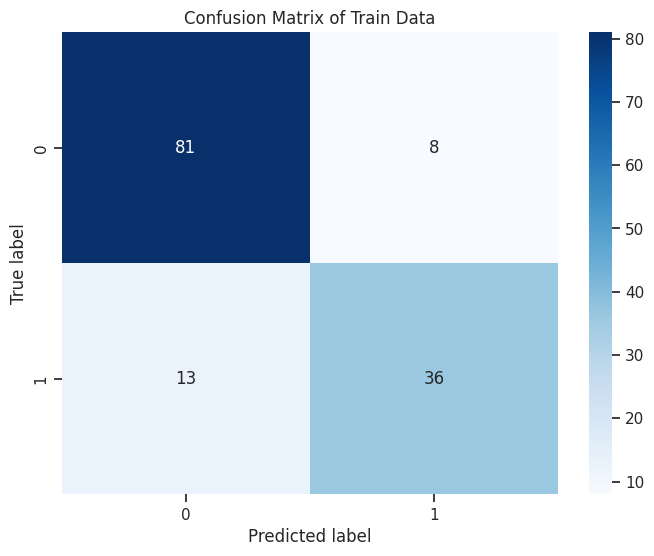

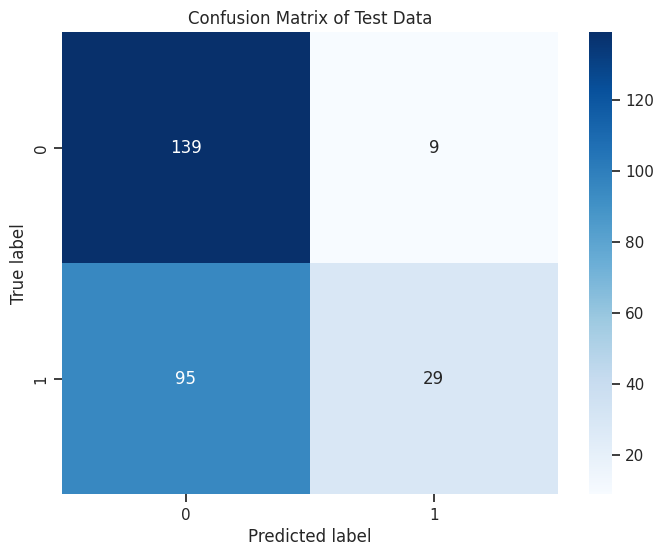

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



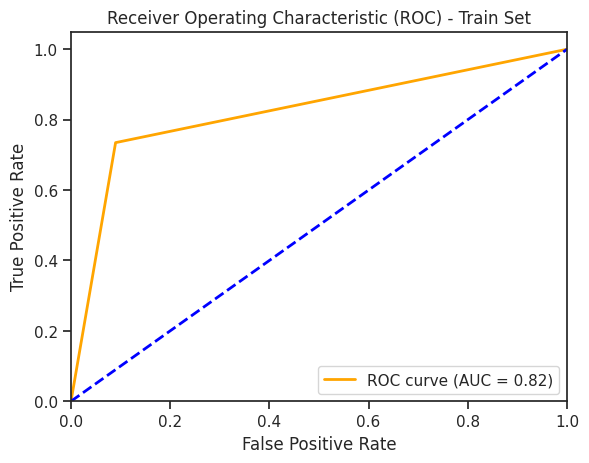

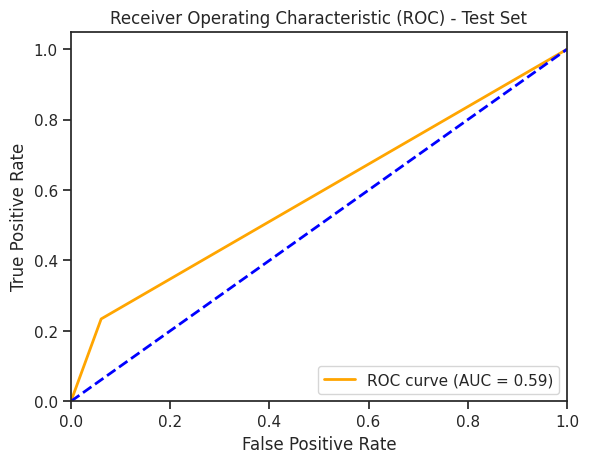

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Sex: 0.58030
Age: 0.00683
BAEP +: 0.94766
MRI spinal lesions: 1.75715
OCB + in CSF: 1.41948


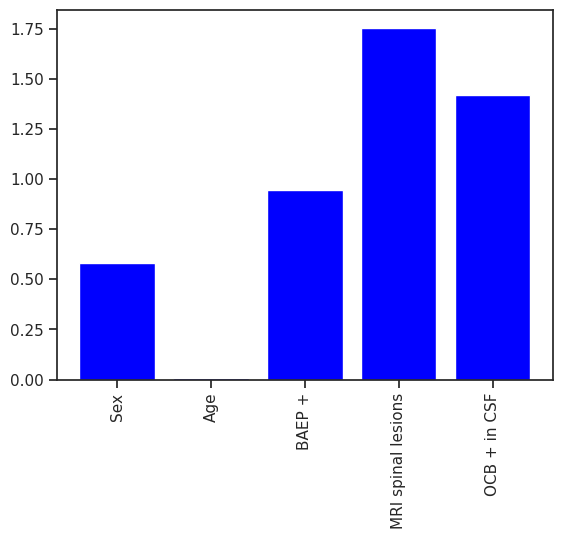

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (selected_features[i], v))

# Get feature names
feature_names = selected_features

# Define colors for each bar
colors = ['blue' if v >= 0 else 'orange' for v in importance]

# Plot feature importances
plt.bar(feature_names, importance, color=colors)
plt.xticks(rotation=90)
plt.show()


#6. Testing on Lithuanian Dataset

In [11]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [13]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                     1                           0   1  
1                     1                           0   1  
2                     0                           0   1  
3                     0                           0   1  
4                     0                           0   1  
..                  ...                         ...  ..  
267                   0                           0   0  
268                   1                           0   0  
269                   1                           0   0  
270                   0                           1   0  
271                   0                           0   0  

[272 rows x 10 columns]

In [ ]:
# Visualise the test dataset
df_test.head(400)

Nr  Sex  Age  Fatigue  General weakness  Pain  Focal symptoms  \
0      2    0   56        0                 0     0               1   
1      3    0   47        0                 0     1               1   
2      4    0   43        0                 0     1               1   
3      5    0   39        0                 0     1               0   
4      6    0   61        0                 0     1               1   
..   ...  ...  ...      ...               ...   ...             ...   
133  165    0   65        0                 0     0               1   
134  166    1   61        0                 0     0               0   
135  167    0   28        0                 1     1               0   
136  169    0   22        0                 0     0               1   
137  170    0   32        0                 0     0               0   

     Cranial Nerve Symptoms  CN3  CN4  ...  Pathological CSF  \
0                         1    0    0  ...                 1   
1                         0    0    0  ...                 0   
2                         1    0    0  ...                 0   
3                         0    0    0  ...                 0   
4                         0    0    0  ...                 1   
..                      ...  ...  ...  ...               ...   
133                       0    0    0  ...                     
134                       1    1    0  ...                 1   
135                       0    0    0  ...                 0   
136                       0    0    0  ...                 0   
137                       1    0    0  ...                 1   

     Increased protein  Increased protein (g/l)  Pleocytosis  \
0                    0                     0.37            0   
1                    0                     0.28            0   
2                    0                     0.38            0   
3                                                          0   
4                    1                     0.57            0   
..                 ...                      ...          ...   
133                                         NaN                
134                  1                     0.96            1   
135                  0                     0.23            0   
136                  0                     0.16            0   
137                  0                     0.23            1   

     Pleocytosis (cells/ml)  OCB + in CSF  IgG levels in CSF  VEP +  BAEP + MS  
0                         4             0                         0       0  0  
1                         0             0               22.9      0       1  0  
2                         2                             25.3      1       0  0  
3                         1             0                                    0  
4                         0             1                         1       0  0  
..                      ...           ...                ...    ...     ... ..  
133                     NaN                                       1       0  0  
134                       6             0                117                 0  
135                       4                                       0          1  
136                       4             1               14.9      0       0  1  
137                       6             0               19.4      0          0  

[138 rows x 44 columns]

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

The train dataset dimensions are: 
(272, 10)
The test dataset dimensions are: 
(138, 44)


In [14]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr','VEP +', 'Periventricular', 'MRI infratentorial lesions'], axis=1)

In [15]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr', 'Fatigue',	'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


Converting the data type for use by the model

In [16]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object


Impute missing data

In [17]:
#Install library for imputation
!pip install impyute

In [18]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [19]:
#Specify x as train dataset (Mexican) and y as test dataset (Lithuanian)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(272, 6)
(138, 6)


Visualising Relationship between Target Variable and Each Feature in x

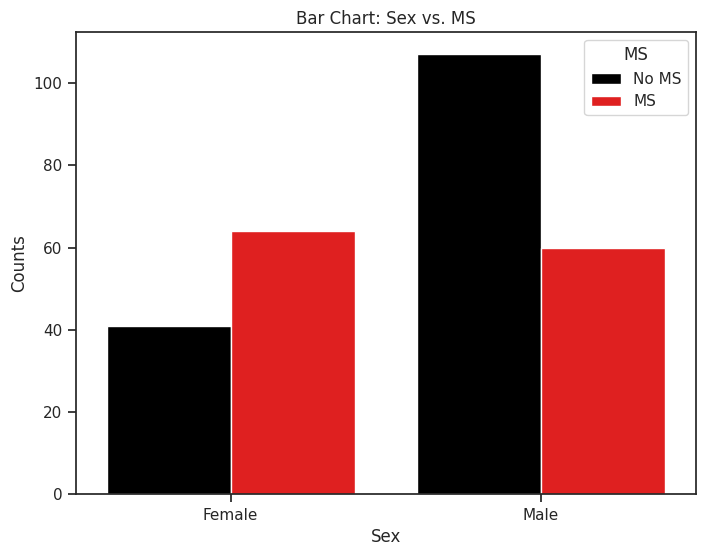

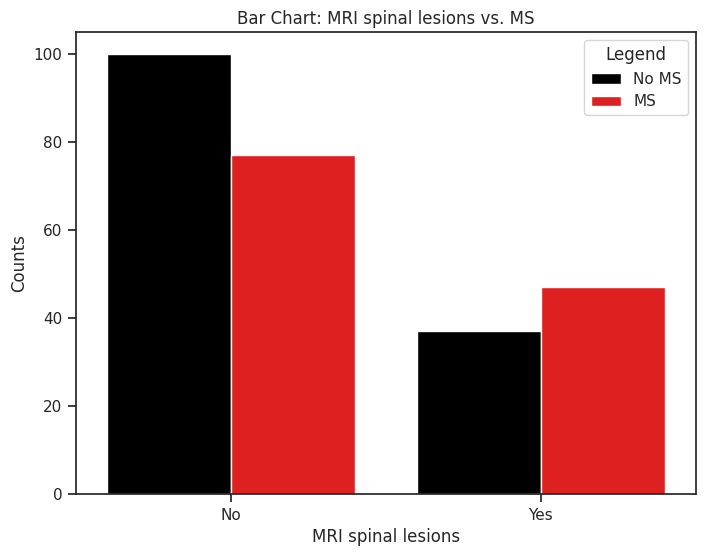

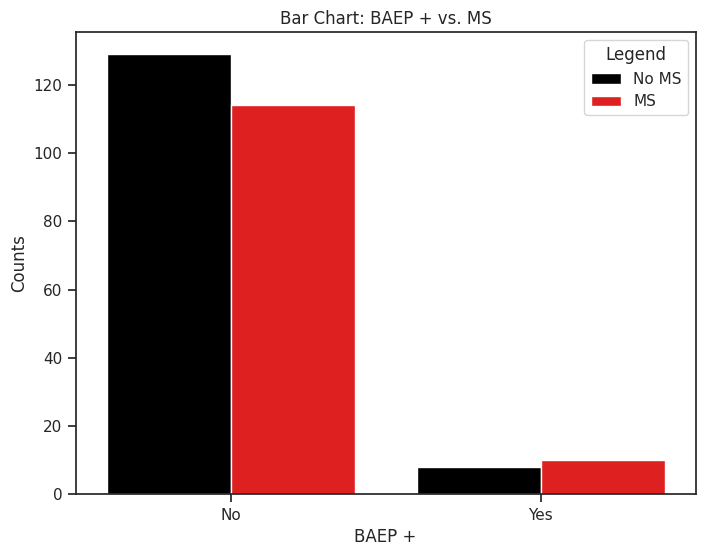

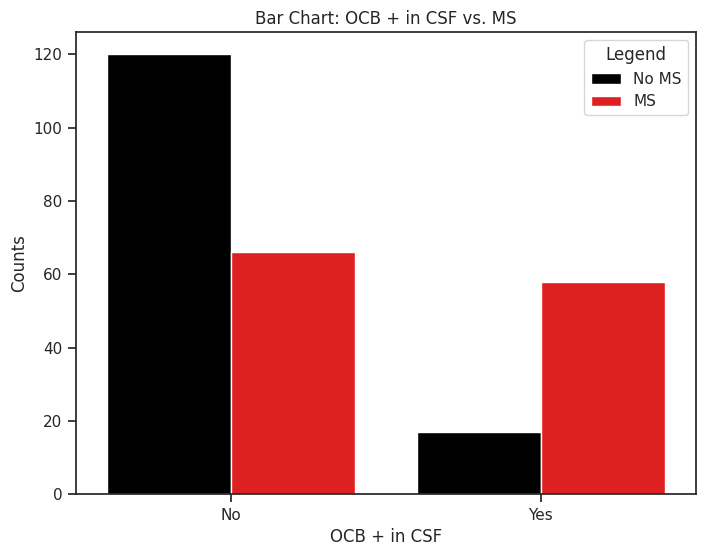

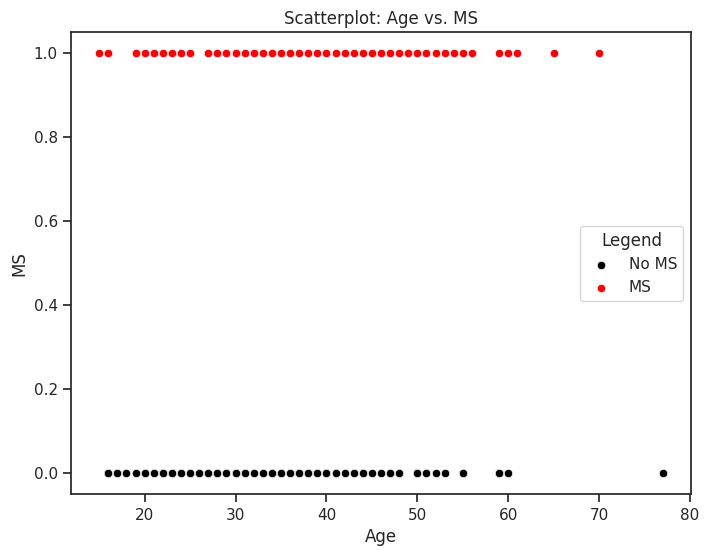

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"black", "red"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate scatterplots for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MS', data=filtered_df[filtered_df['MS'] == 0], color='black', label='No MS')
sns.scatterplot(x='Age', y='MS', data=filtered_df[filtered_df['MS'] == 1], color='red', label='MS')

plt.xlabel("Age")
plt.ylabel("MS")
plt.title("Scatterplot: Age vs. MS")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


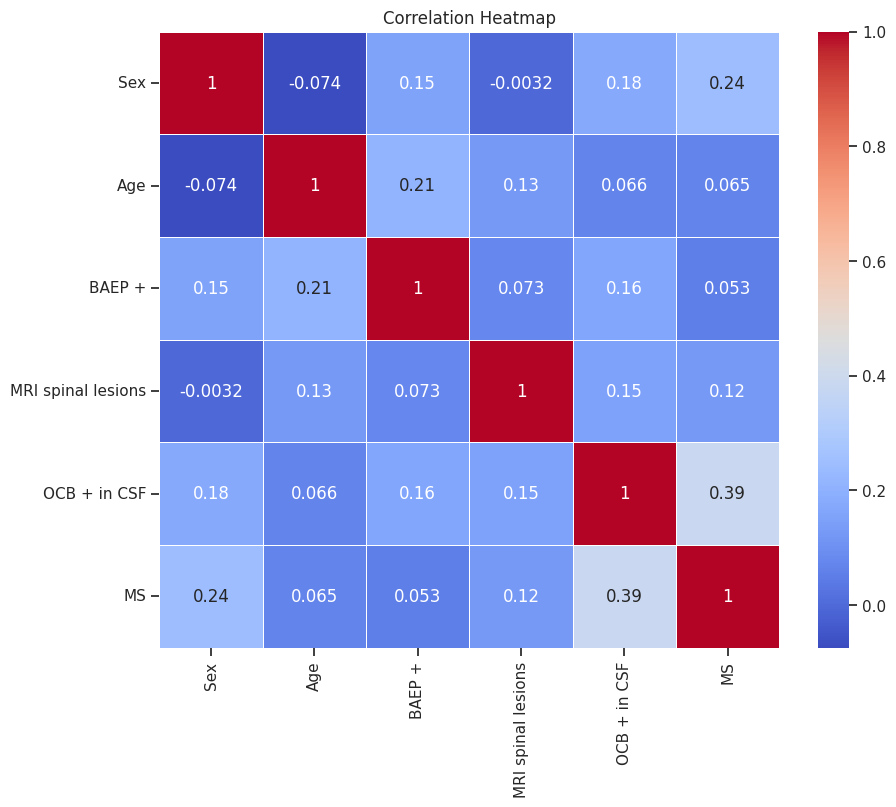

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


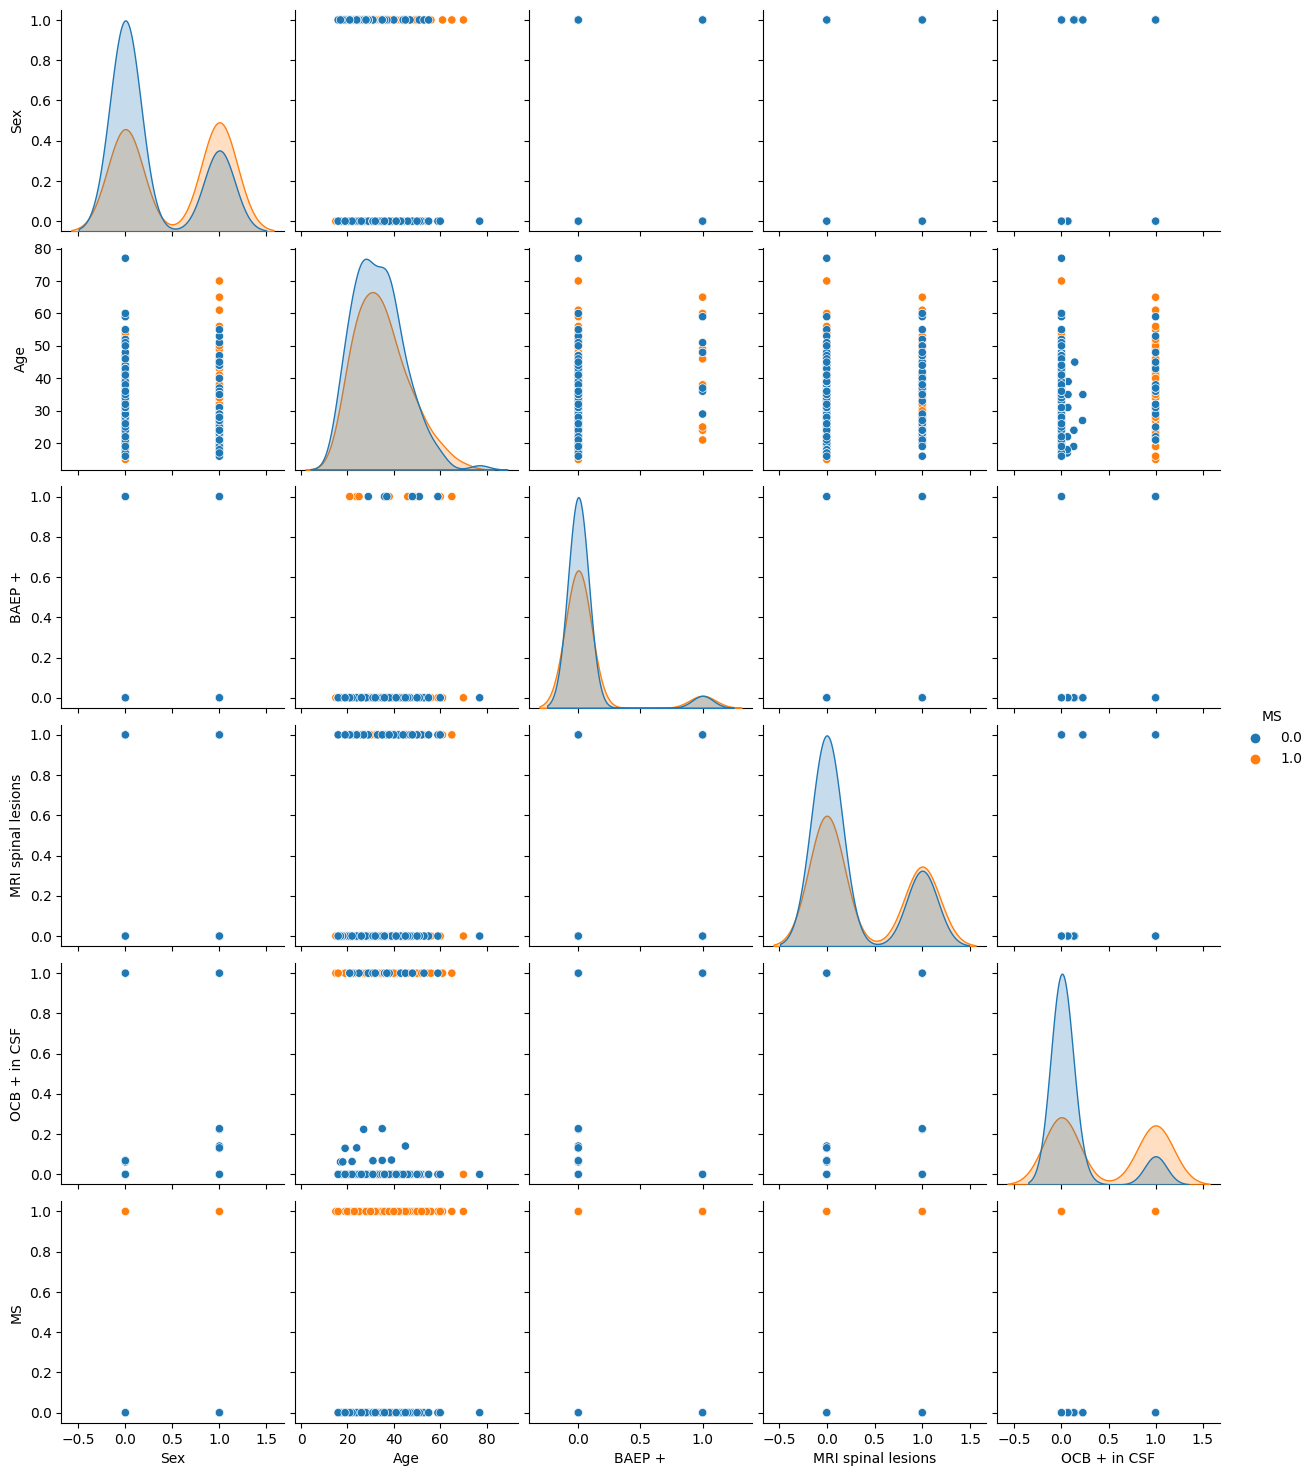

In [21]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


No Multicollinearity Observed


Checking for imbalanced classes in the dataset

Sex  Age   MRI spinal lesions  OCB + in CSF  BAEP +    MS 
0.0  54.0  0.110098             0.000000     1.000000  0.0    1.449275
     40.0  0.247087             0.000000     0.000000  0.0    1.449275
     32.0  0.406146             0.227130     0.000000  0.0    1.449275
1.0  26.0  0.532867             0.000000     0.035932  0.0    1.449275
0.0  41.0  0.329430             0.181170     0.000000  0.0    1.449275
                                                                ...   
           0.000000            -0.051859     0.000000  0.0    0.724638
     40.0  0.337954             0.186277     0.000000  0.0    0.724638
     39.0  0.246305             0.000000     0.117401  0.0    0.724638
     38.0  0.000000             0.000000     0.000000  1.0    0.724638
1.0  73.0  1.000000             1.000000     1.000000  1.0    0.724638
Length: 132, dtype: float64


<Figure size 640x480 with 0 Axes>

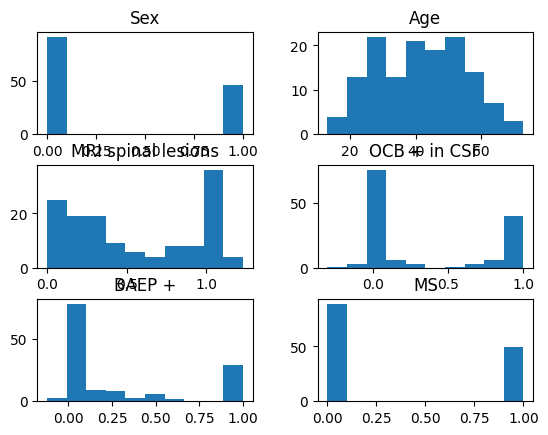

ValueError: ignored

In [23]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Cross-validation

In [ ]:
#Import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression model
lr_model = LogisticRegression()

# Perform stratified k-fold cross-validation for Logistic Regression Classifier
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

Specify features and target variable

In [ ]:
#Specify x as train dataset (Mexican) and y as test dataset (Lithuanian)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(272, 6)
(138, 6)


Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in lr_skfold.split(imputed_df_train, imputed_df_train['MS']):
    x_train_fold, x_test_fold = imputed_df_train.iloc[train_index], imputed_df_train.iloc[test_index]
    y_train_fold, y_test_fold = imputed_df_train['MS'].iloc[train_index], imputed_df_train['MS'].iloc[test_index]

    # Fitting the model and making predictions for train set
    lr_model.fit(x_train_fold, y_train_fold)
    y_train_pred = lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = lr_model.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 1.0
Standard Deviation of Train F1 Score: 0.0
Average Test F1 Score: 1.0
Standard Deviation of Test F1 Score: 0.0


##Hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Logistic Regression model
lr= LogisticRegression(random_state=1)

# Create an instance of GridSearchCV for Logistic Regression Classifier
lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
lr_cv.fit(imputed_df_train[selected_features], imputed_df_train['MS'])

# Print best parameters and accuracy score
print("Best Parameters:", lr_cv.best_params_)
print("Accuracy:", lr_cv.best_score_)



Best Parameters: {'C': 5.0, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear'}
Accuracy: 0.698015873015873


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

##Model Training and Prediction:

In [ ]:
# Make predictions on imputed_df_train using the best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(imputed_df_train[selected_features])

# Make predictions on imputed_df_test using the best model
y_test_pred = best_model.predict(imputed_df_test[selected_features])

##Visualise Various Classification Metrics

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       148
         1.0       0.70      0.63      0.66       124

    accuracy                           0.71       272
   macro avg       0.70      0.70      0.70       272
weighted avg       0.71      0.71      0.70       272


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76        89
         1.0       0.58      0.92      0.71        49

    accuracy                           0.74       138
   macro avg       0.76      0.78      0.74       138
weighted avg       0.81      0.74      0.74       138



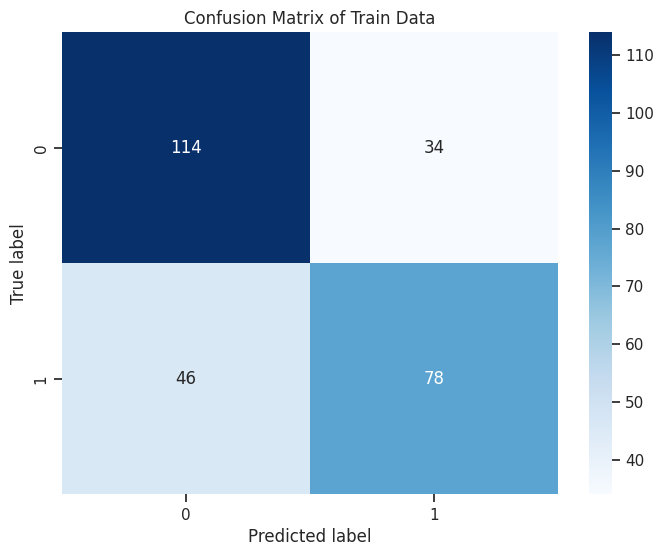

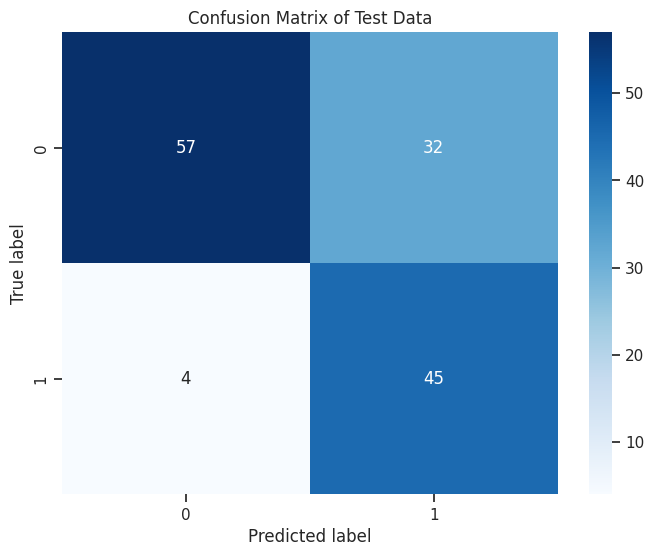

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



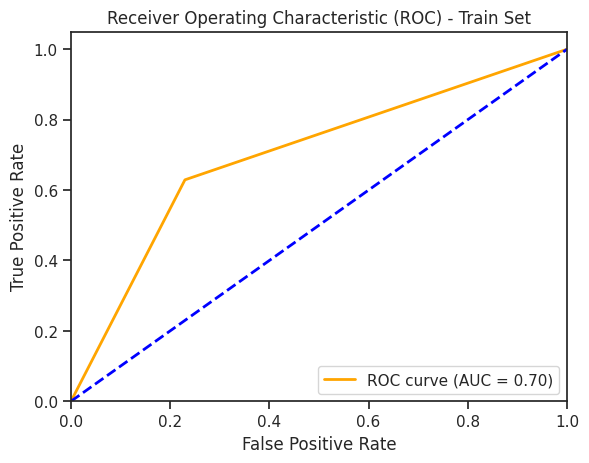

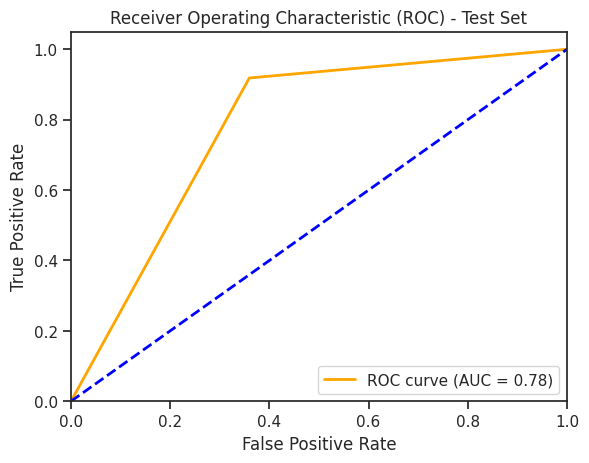

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculate Feature Importance Scores

Sex: 0.93850
Age: 0.01259
BAEP +: -0.45248
MRI spinal lesions: 0.37583
OCB + in CSF: 1.71828


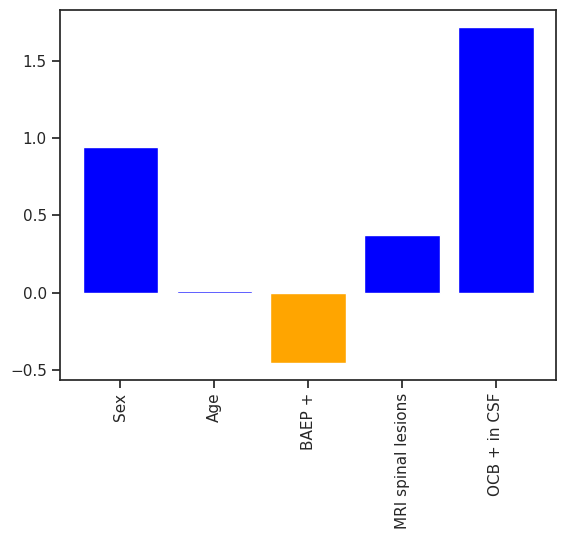

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (selected_features[i], v))

# Get feature names
feature_names = selected_features

# Define colors for each bar
colors = ['blue' if v >= 0 else 'orange' for v in importance]

# Plot feature importances
plt.bar(feature_names, importance, color=colors)
plt.xticks(rotation=90)
plt.show()


#7. Using Concatenated Dataset (Mexican+Lithuanian Combined)

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Concatenated Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34            0    0.0     0.0              0.0   
1      2    1   61            1    1.0     0.0              0.0   
2      3    1   22            1    0.0     0.0              0.0   
3      4    0   41            1    1.0     0.0              1.0   
4      5    0   34            0    0.0     0.0              1.0   
..   ...  ...  ...          ...    ...     ...              ...   
135  136    0   37            0    0.0     0.0              1.0   
136  137    0   52            0    0.0     0.0              0.0   
137  138    0   48            0    1.0     1.0              1.0   
138  139    0   25            1    1.0     0.0              1.0   
139  140    1   40            0    0.0     0.0              1.0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                   1.0                         0.0   1  
1                   1.0                         0.0   1  
2                   0.0                         0.0   1  
3                   0.0                         0.0   1  
4                   0.0                         0.0   1  
..                  ...                         ...  ..  
135                 0.0                         0.0   0  
136                 1.0                         0.0   0  
137                 0.0                         0.0   0  
138                 1.0                         0.0   0  
139                 0.0                         0.0   0  

[140 rows x 10 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(410, 10)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Periventricular', 'VEP +', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                float64
MRI spinal lesions    float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[['Age', 'MRI spinal lesions', 'OCB + in CSF', 'BAEP +', 'Sex']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(410, 5)
(410,)


Visualising Relationship between Target Variable and Each Feature in X

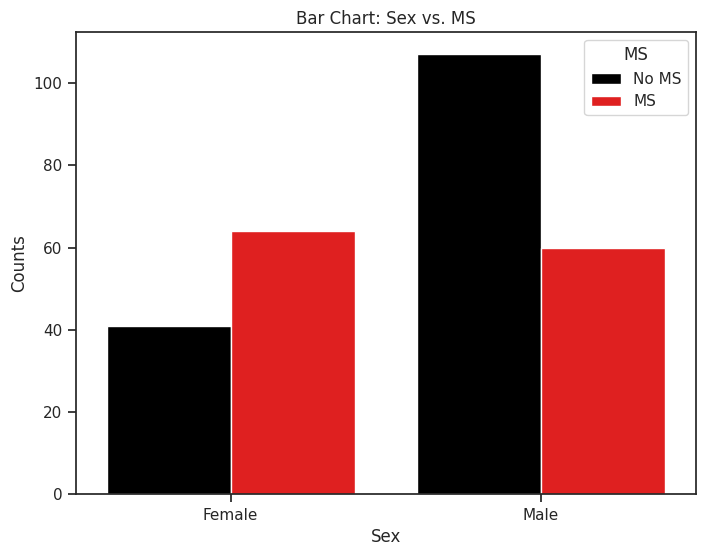

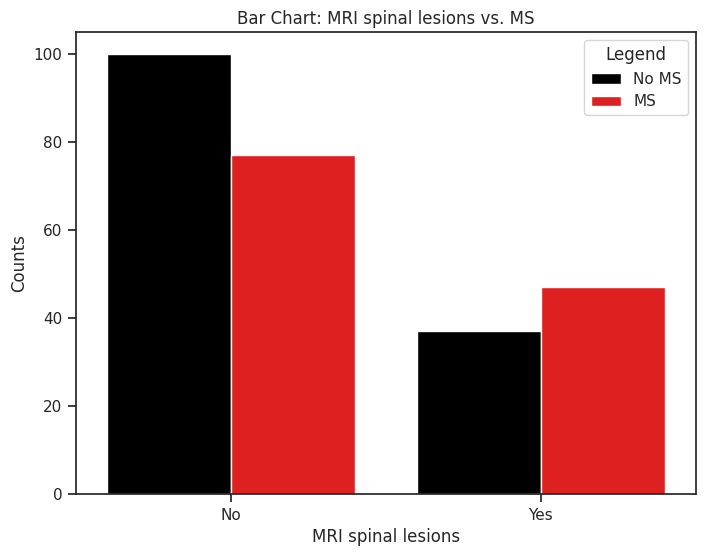

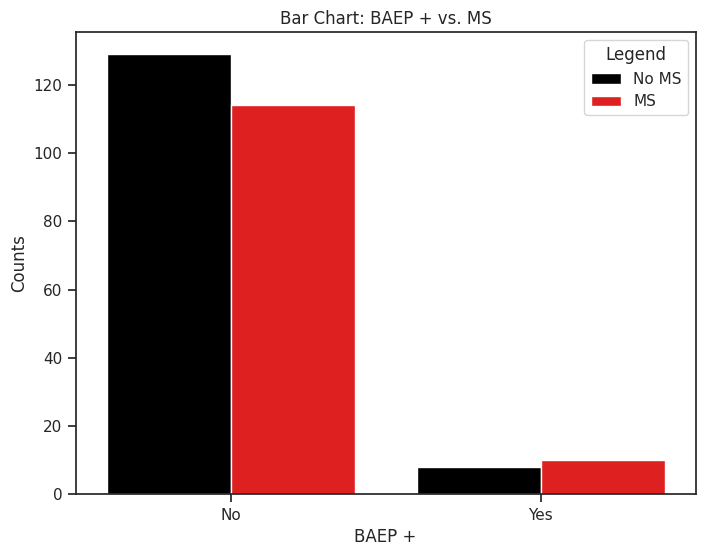

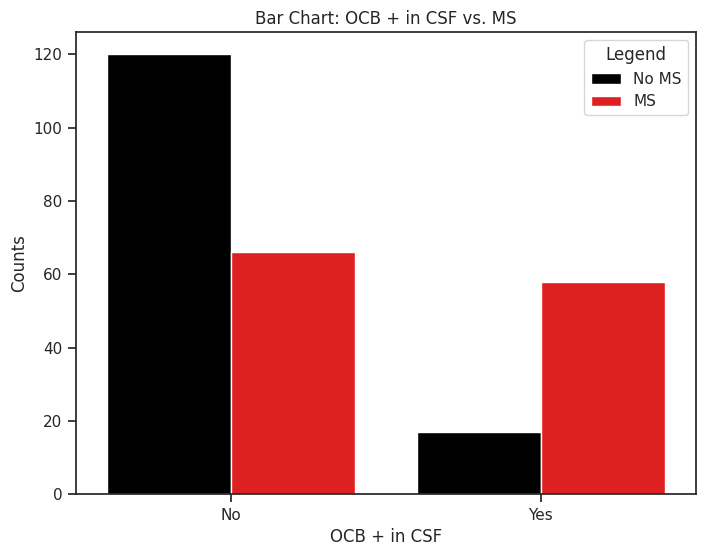

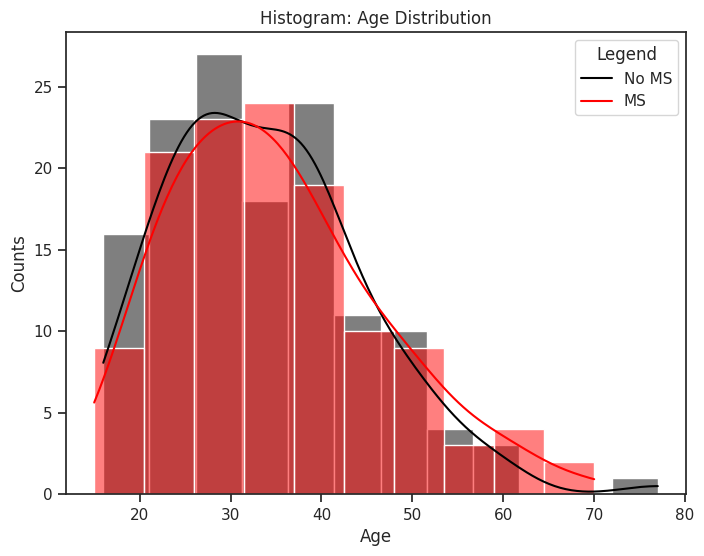

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"black", "red"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate histograms for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df[filtered_df['MS'] == 0]['Age'], color='black', label='No MS', kde=True)
sns.histplot(filtered_df[filtered_df['MS'] == 1]['Age'], color='red', label='MS', kde=True)

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Histogram: Age Distribution")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


Age  MRI spinal lesions  OCB + in CSF    BAEP +  \
Age                 1.000000            0.158445      0.000326  0.265891   
MRI spinal lesions  0.158445            1.000000      0.112406  0.049644   
OCB + in CSF        0.000326            0.112406      1.000000  0.224443   
BAEP +              0.265891            0.049644      0.224443  1.000000   
Sex                -0.052749            0.012133      0.088827  0.073356   
MS                 -0.010642            0.075934      0.443946  0.116165   

                         Sex        MS  
Age                -0.052749 -0.010642  
MRI spinal lesions  0.012133  0.075934  
OCB + in CSF        0.088827  0.443946  
BAEP +              0.073356  0.116165  
Sex                 1.000000  0.217936  
MS                  0.217936  1.000000

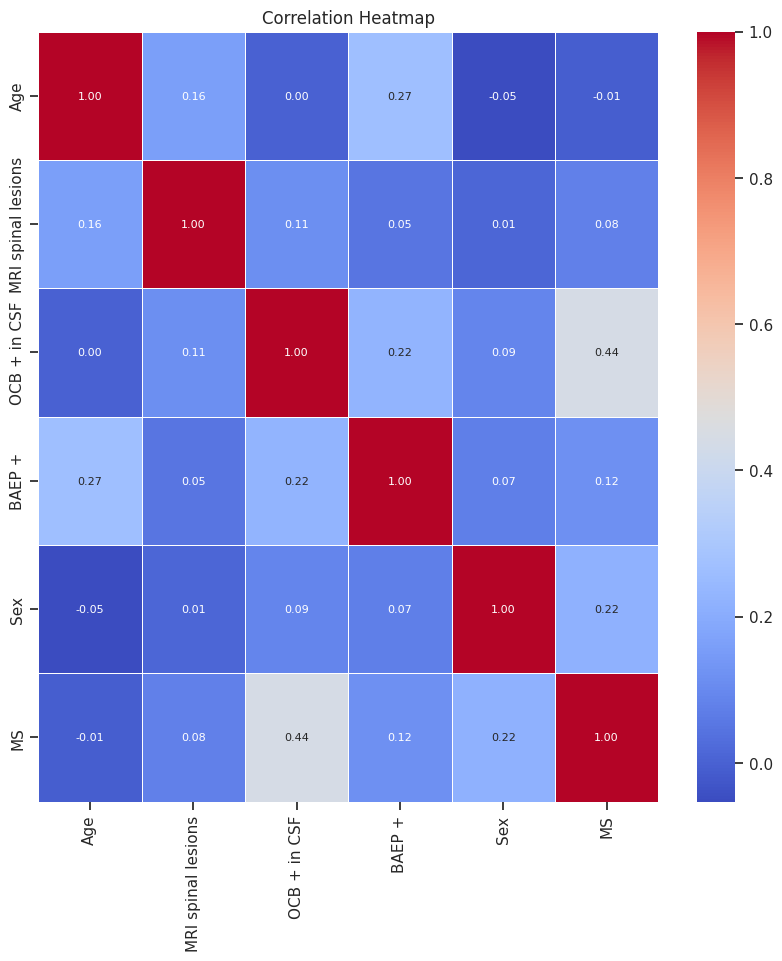

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

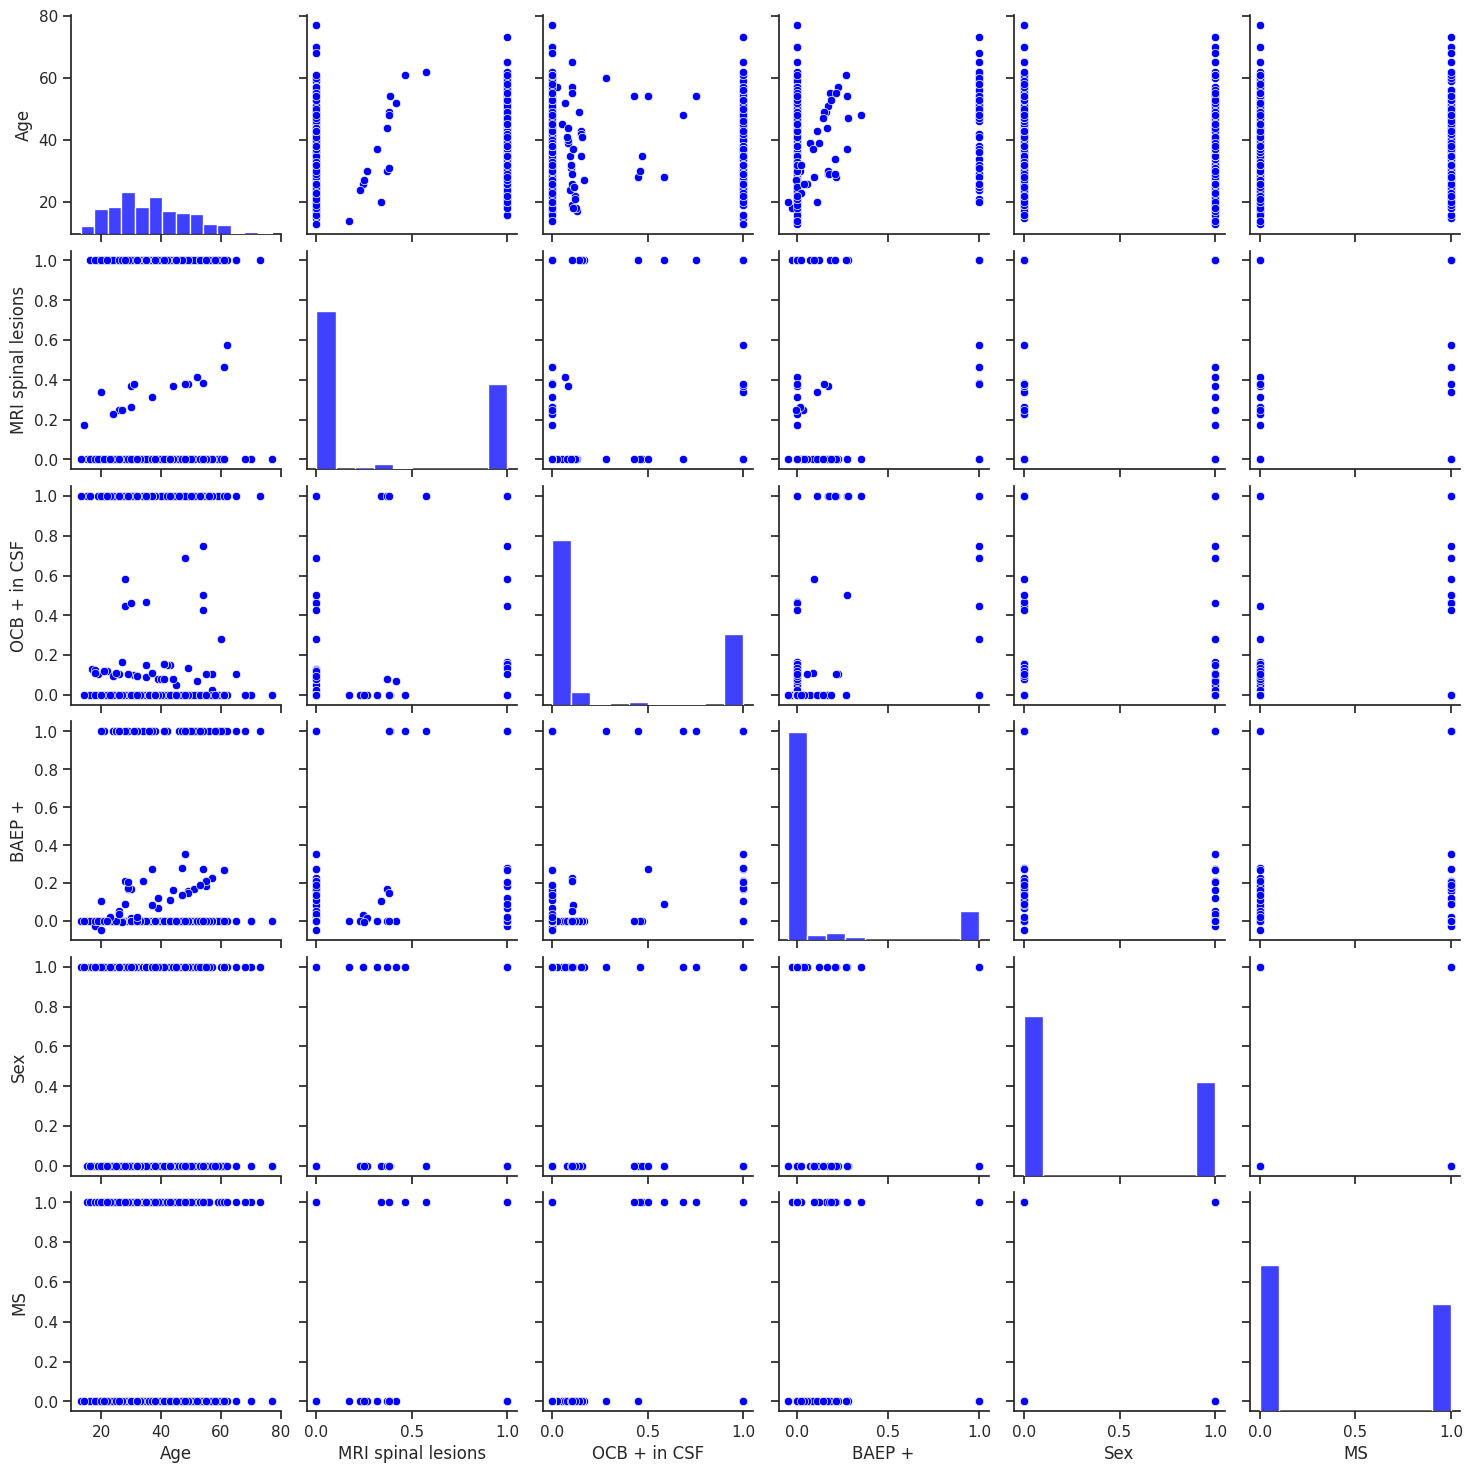

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    57.804878
1.0    42.195122
Name: MS, dtype: float64


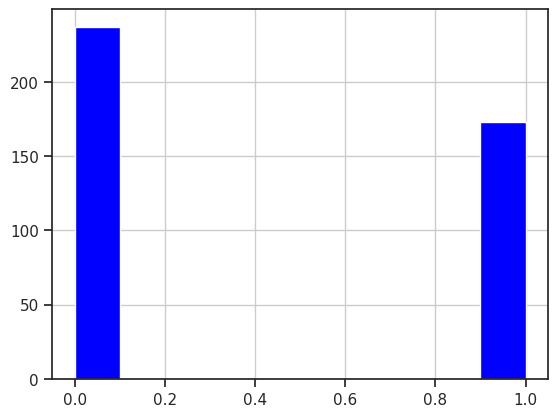

The baseline accuracy is: 0.5780487804878048


In [ ]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualize dataset imbalance
import matplotlib.pyplot as plt
y.hist(color=['blue'])
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)


##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (328, 5)
x_test: (82, 5)
y_train: (328,)
y_test: (82,)


##Cross-validation

In [ ]:
#Import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression model
lr_model = LogisticRegression()

# Perform stratified k-fold cross-validation for Logistic Regression Classifier
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
lr_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in lr_skfold.split(x_train, y_train):
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fitting the model and making predictions for train set
    lr_model.fit(x_train_fold, y_train_fold)
    y_train_pred = lr_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = lr_model.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 0.6220168366724186
Standard Deviation of Train F1 Score: 0.008927987818828503
Average Test F1 Score: 0.6165841984102853
Standard Deviation of Test F1 Score: 0.07095175367005711


##Hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Logistic Regression Classifier
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Logistic Regression model
lr= LogisticRegression(random_state=1)

# Create an instance of GridSearchCV for Logistic Regression Classifier
lr_cv = GridSearchCV(lr, lr_param_grid, cv=lr_skfold)

##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
lr_cv.fit(x_train, y_train)

# Print best parameters and accuracy score
print("Best Parameters:", lr_cv.best_params_)
print("Accuracy:", lr_cv.best_score_)


Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear'}
Accuracy: 0.7380681818181818


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

##Model Training and Prediction:

In [ ]:
# Make predictions on the train set using best model
best_model = lr_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = lr_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       190
         1.0       0.76      0.54      0.63       138

    accuracy                           0.73       328
   macro avg       0.74      0.71      0.71       328
weighted avg       0.74      0.73      0.72       328


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77        47
         1.0       0.72      0.51      0.60        35

    accuracy                           0.71        82
   macro avg       0.71      0.68      0.68        82
weighted avg       0.71      0.71      0.70        82



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

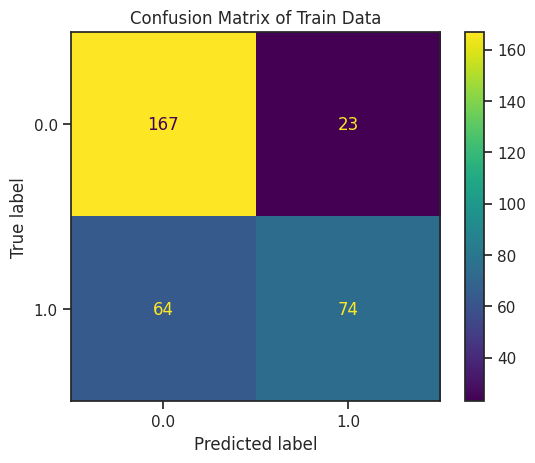

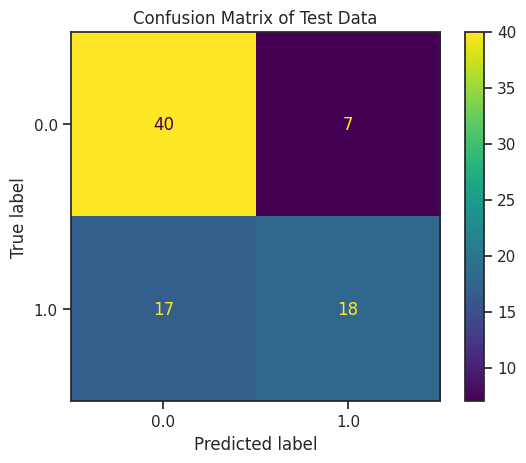

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

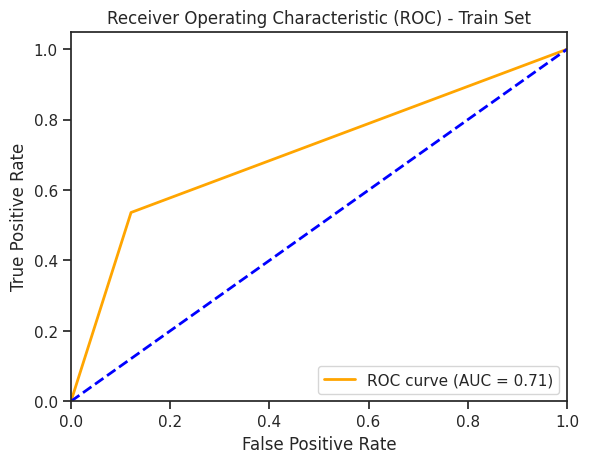

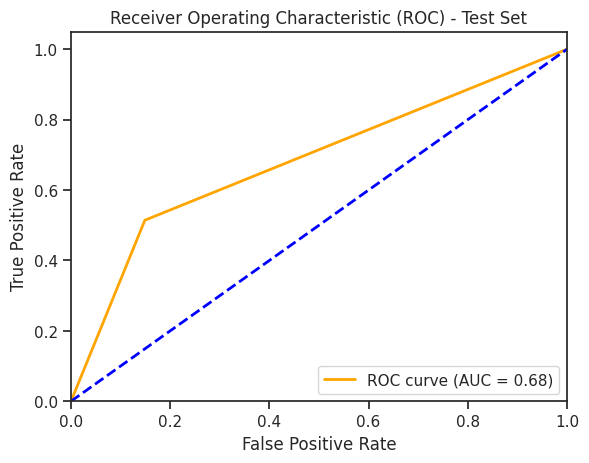

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Age: -0.02115
MRI spinal lesions: 0.00000
OCB + in CSF: 1.32213
BAEP +: 0.00000
Sex: 0.30461


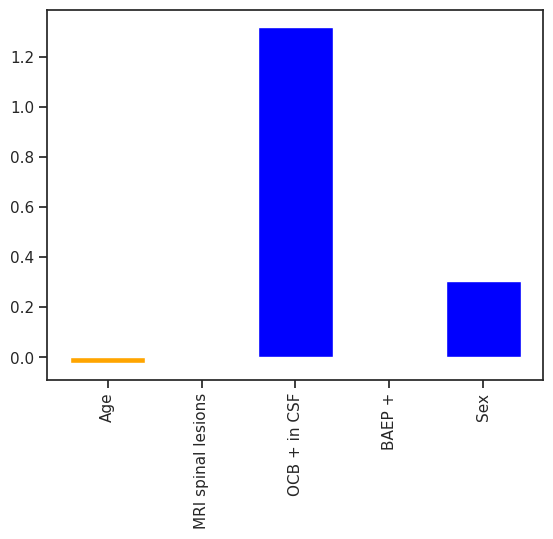

In [ ]:
importance = best_model.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Define colors for each bar
colors = ['blue' if v >= 0 else 'orange' for v in importance]

# Plot feature importances
plt.bar(feature_names, importance, color=colors)
plt.xticks(rotation=90)
plt.show()

